***This notebook is based on the class notes of Foundation of Data Science in BGSE 2019-2020 academic year***

In [1]:
from matplotlib import colors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import precision_recall_curve
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

def plot_boundaries_iris_dataset(model, iris):
    plt.figure(figsize=(14, 10))
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
        
        
        # Parameters
        n_classes = 3
        plot_colors = "rgb"
        cmap = colors.ListedColormap(['mistyrose', 'honeydew', 'lavender'])
        plot_step = 0.02

        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf = sklearn.base.clone(model)
        clf.fit(X, y)

        
        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap= cmap)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        plt.axis("tight")

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.Paired, s=5, alpha = 0.8)

        plt.axis("tight")

    plt.suptitle("Decision surface using paired features")
    plt.legend()
    plt.show()

    
    
def plot_confusion_matrix(cm, class_labels):
    """Pretty prints a confusion matrix as a figure

    Args:
        cm:  A confusion matrix for example
        [[245, 5 ], 
         [ 34, 245]]
         
        class_labels: The list of class labels to be plotted on x-y axis

    Rerturns:
        Just plots the confusion matrix.
    """
    
    df_cm = pd.DataFrame(cm, index = [i for i in class_labels],
                  columns = [i for i in class_labels])
    sns.set(font_scale=1)
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel("Predicted label")
    plt.ylabel("Real label")
    plt.show()
    
    
from sklearn.metrics import roc_curve, roc_auc_score
def get_auc(y, y_pred_probabilities, class_labels, column =1, plot = True):
    fpr, tpr, _ = roc_curve(y == column, y_pred_probabilities[:,column])
    roc_auc = roc_auc_score(y_true=y, y_score=y_pred_probabilities[:,1])
    print ("AUC: ", roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

import random
def plot_digits_sample(images, target, labels = None):
    # The data that we are interested in is made of 8x8 images of digits, let's
    # have a look at the first images, stored in the `images` attribute of the
    # dataset.  If we were working from image files, we could load them using
    # matplotlib.pyplot.imread.  Note that each image must have the same size. For these
    # images, we know which digit they represent: it is given in the 'target' of
    # the dataset.
    

    fig, axes = plt.subplots(5, 5, figsize=(5, 5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        im = random.randint(0, len(images)-1)
        ax.imshow(images[im].reshape([8,8]), cmap=plt.cm.gray_r, interpolation='nearest')
        ax.text(0.05, 0.05, str(target[im]),
                transform=ax.transAxes, color='green')

    plt.show()
    

    

In [2]:

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

$\newcommand{\bb}{\boldsymbol{\beta}}$
$\DeclareMathOperator{\Gau}{\mathcal{N}}$
$\newcommand{\bphi}{\boldsymbol \phi}$
$\newcommand{\bpi}{\boldsymbol \pi}$
$\newcommand{\bx}{\boldsymbol{x}}$
$\newcommand{\by}{\boldsymbol{y}}$
$\newcommand{\bmu}{\boldsymbol{\mu}}$
$\newcommand{\bS}{\boldsymbol{\Sigma}}$
$\newcommand{\whbb}{\widehat{\bb}}$
$\newcommand{\hf}{\hat{f}}$
$\newcommand{\hy}{\hat{y}}$
$\newcommand{\tf}{\tilde{f}}$
$\newcommand{\ybar}{\overline{y}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\Var}{Var}$
$\newcommand{\Cov}{Cov}$
$\newcommand{\Cor}{Cor}$

In [3]:
spam = pd.read_csv("spam_small_train.csv")
spam.head()

word_freq_george  word_freq_you  word_freq_your  word_freq_hp  \
0               0.0           1.93            0.96           0.0   
1               0.0           3.47            1.59           0.0   
2               0.0           1.36            0.51           0.0   
3               0.0           3.18            0.31           0.0   
4               0.0           3.18            0.31           0.0   

   word_freq_free  word_freq_hpl  word_freq_our  word_freq_re  word_freq_edu  \
0            0.32            0.0           0.32          0.00           0.00   
1            0.14            0.0           0.14          0.00           0.00   
2            0.06            0.0           1.23          0.06           0.06   
3            0.31            0.0           0.63          0.00           0.00   
4            0.31            0.0           0.63          0.00           0.00   

   word_freq_remove  char_freq_!  class  
0              0.00        0.778      1  
1              0.21        0.372      1  
2              0.19        0.276      1  
3              0.31        0.137      1  
4              0.31        0.135      1

# Checking class balance in the data

## Bar Plot Repres.

***Easiest way to check balance between 2 classes***

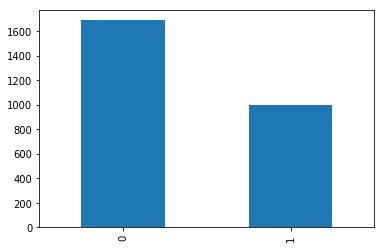

In [4]:
spam["class"].value_counts().plot(kind="bar")

## Box plot 

***We check how each feature differs between classes, when we check the class 0 which is not spam, features seem to distributed more randomly, boxes are really small means frequencies of the words differs a lot from email to email***

***On the other hand when we check the spam emails, frequincies of soe words common to each email, for instance george seems to never appears in a spam email and freq. of "you" seems to be around 0-4 percent for all spam emails***

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

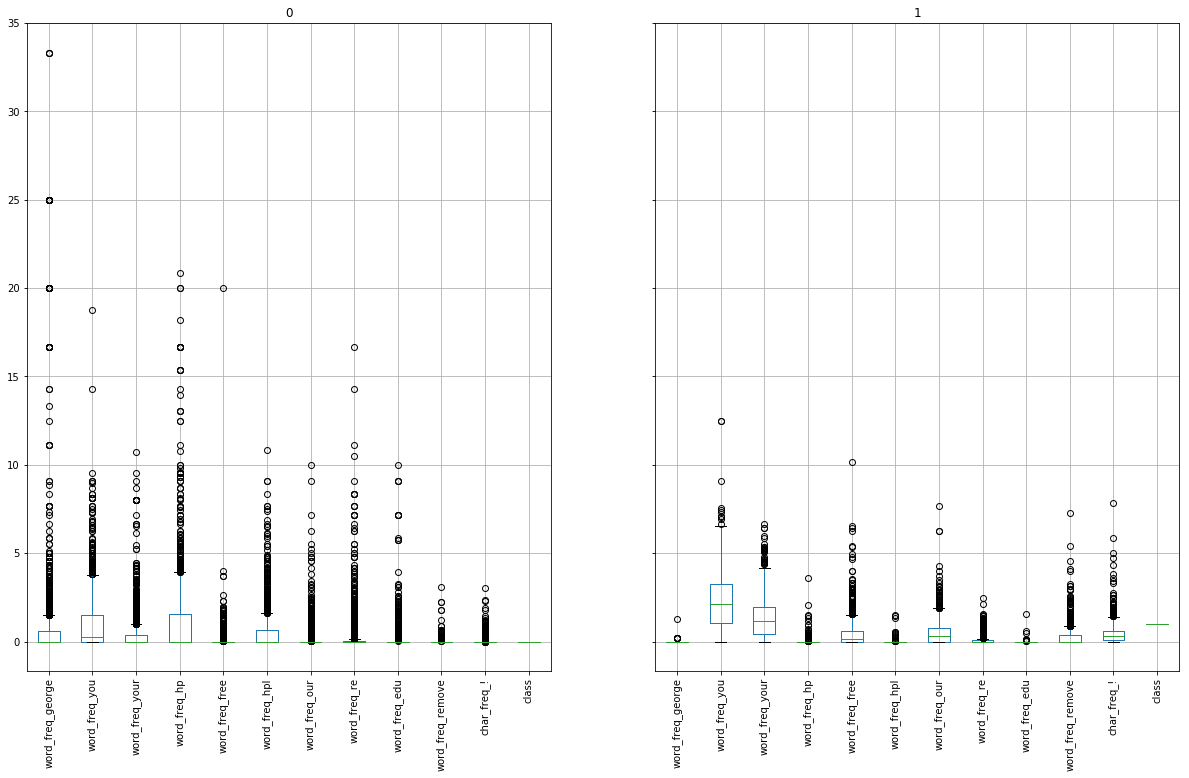

In [5]:
spam.groupby("class").boxplot(figsize=(20,12), rot=90)

# Probabilistic classification using logistic regression

***We obtain likelihood function from bernoul. distr. since we have 2 classes 0 and 1***

***Bernoul. distr. is given by:***

$$Bern(x \mid \mu) = \mu^{1-x} \cdot (1- \mu)^x$$

***where:***

$$p(x=1 \mid \mu) = 1 - \mu \quad and \quad p(x=0 \mid \mu) = \mu$$

***Since our features will not be always in the range 0-1 we need a way to map features to 0-1 range meaning prob. range. Thus we use the logit activation function to map features to probabilities and we optimize over negative likelihood and obtain our weights***

***Consider***
$$\mu = \frac{1}{1 + e^{-f(x, \beta)}}$$ 

$$1 - \mu = 1 - \frac{1}{1 + e^{-f(x, \beta)}}$$

***likelihood becomes***
$$p(y_i \mid f(x_i, \beta)) = (\frac{1}{1 + e^{-f(x_i, \beta)}})^{1 - y_i} \cdot (1 - \frac{1}{1 + e^{-f(x_i, \beta)}})^{y_i}$$

***Negative likelihood becomes***
$$- \log p(y_i | \bx_i) =  \log (1+e^{-f(\bx_i,\bb)}) + y_i f(\bx_i,\bb) $$ 

***hence, the loss function becomes***

$$L(\bb) = \sum_i \log (1+e^{-f(\bx_i,\bb)}) + y_i f(\bx_i,\bb) $$

In [6]:
X_train = spam.drop(["class"], axis=1).values.reshape(-1,11)
y_train = spam["class"].values.reshape(-1, 1)

In [7]:
lregr = LogisticRegression(C=100.0, solver="liblinear", max_iter=500)
lregr.fit(X_train, y_train)

/Users/guneykan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting Probabilities - BoxPlot

***Note the shape of the probs. COL. 0 corresponds to Probs of class being 0 and COL. 1 corresponds to probs. of class is equal to 1***

In [8]:
y_train_prob = lregr.predict_proba(X_train)
y_train_prob.shape

(2686, 2)

***Attach the Probs. to original data frame and plot them***

***Note that, model gives really high probs. to the classes that are 0 which means its doing a poor job***

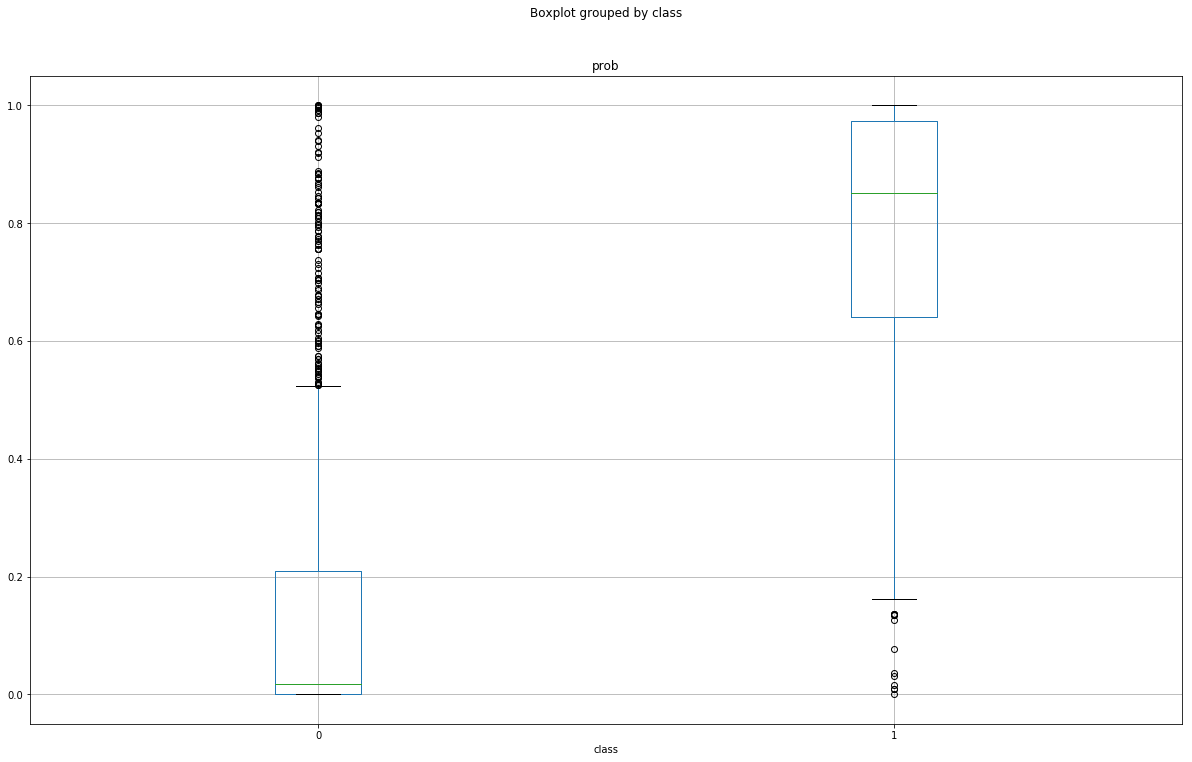

In [9]:
spam_arb = spam.copy()
spam_arb["prob"] = y_train_prob[:, 1]
spam_arb.boxplot(by="class", column="prob", figsize=(20,12))

## Turning probabilities into class prediction

$y \sim Bernoulli(\pi)$ then $\Var(y) = \pi (1- \pi)$, which is large for $\pi \approx 1/2$

Meaning when model assigns close probs. to both classes she is not sure about her estimation resulting in high variance


In [10]:
y_train_pred = lregr.predict(X_train)

## Confusion Matrix

***Designed to Confuse you***

***Rows represents real classes while cols represent predicted classes. 1-1 row-col represents true negatives meaning "0" labels predicted as "0". While 1-2 represents false positives meaning "0" labels predicted as "1" false positives -> actually negative("0") but predicted positive("1") thus the name false positive***

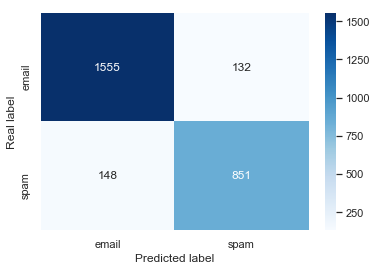

In [11]:
cm = confusion_matrix(y_train, y_train_pred)
class_labels = ["email", "spam"]
plot_confusion_matrix(cm, class_labels)

## Misclassification rate

$$p[ y \neq \hy]$$ 

is known as the misclassification probability. This can be estimated from data very much the same way as $R^2$: in sample (which can be negatively biased), out of sample (which is data intensive), by cross-validation etc;

This number in isolation means pretty much nothing. Consider or example the (all too common situation) where we wish to predict $y$ in a population such that $p[y=1] = 0.001$. Then classifying everyone as $\hy = 0$ yields a misclassification probability 0.001 but the algorithm is never able to identify the class of interest. Missclassification rate can be useful in comparisons. 

There are other performance metrics - related to conditional probabilities - e.g. $p[\hy =1 | y=1]$ etc - such as specificity/sensitivity for qualifying the performance of a classifier

specificity = True Negative Rate = $\frac{TN}{TN + FP} = 1- FPR$ -> fraction of correctly classified negative instances

sensitivity = Recall = True Positive Rate

In [12]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1687
           1       0.87      0.85      0.86       999

    accuracy                           0.90      2686
   macro avg       0.89      0.89      0.89      2686
weighted avg       0.90      0.90      0.90      2686



## ROC curve and AUC

A common tool to assess the performance of a probabilistic classifier is the ROC curve. Each point on this curve is (an estimate of) pair

First term refers to false positive rate and second term refers to true positive rate.

$$
(p([\hy = 1 | y = 0] , p[\hy =1 | y = 1]) 
$$

For a given threshold $t$ we can estimate these probabilities from the confusion matrix - obtained in the best way we can - simply by computing the associated frequencies

As we vary the threshold the confusion matrices change and the frequencies too: varying $t$ from 0 to 1 we obtain the ROC curve - read the figure from right to left

We do this now using a customized function. I will do it on a test spam data


$$TPR = \frac{TP}{TP + FN}$$

$$FPR = \frac{FP}{TN + FP}$$

True positive rate corresponds classes that are 1 and predicted as 1 divided by all the real 1s in the data (true predictions of 1 + wrong predictions of 0)

False Positive Rate corresponds to classes that are 0 but predicted as 1 divided by all the real 0s in the data (true predictions of 0 + wrong predictions of 1)

Top right corner corresponds to prob. threshold is equal to 0. Which is predicting 1 everything and it will result in 100% TPR because we will predict all the true positives as positive but also we will predict all the negatives as positive thus FPR will result in being 100%

So there is a trade-off as we decrease the threshold we correctly classify 1s more but also we start to classify 0s as 1 more and more.

Imagine we draw a random data-point from data 1s and another point from 0s what is prob. that our model classifies both of these instances correctly that is equal to AUC.

Another explaination is: AUC is as the probability that the model ranks a random positive example more highly than a random negative example, in terms of prob.

AUC:  0.9258088893864757


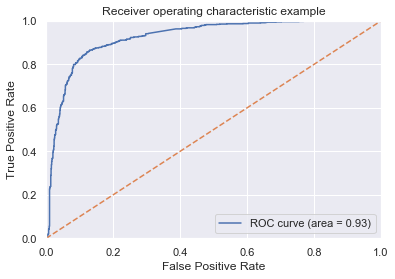

In [13]:
spam_test = pd.read_csv("spam_small_test.csv")
Ftest = spam_test.drop("class",axis=1)
ytest = spam_test["class"]

test_pred = lregr.predict_proba(Ftest)

# Custom plot function
get_auc(ytest, test_pred, class_labels, column=1, plot=True) # Helper function

## Obtaining optimal threshold

In [14]:
fpr, tpr, _ = roc_curve(ytest, test_pred[:, 1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = _[optimal_idx]

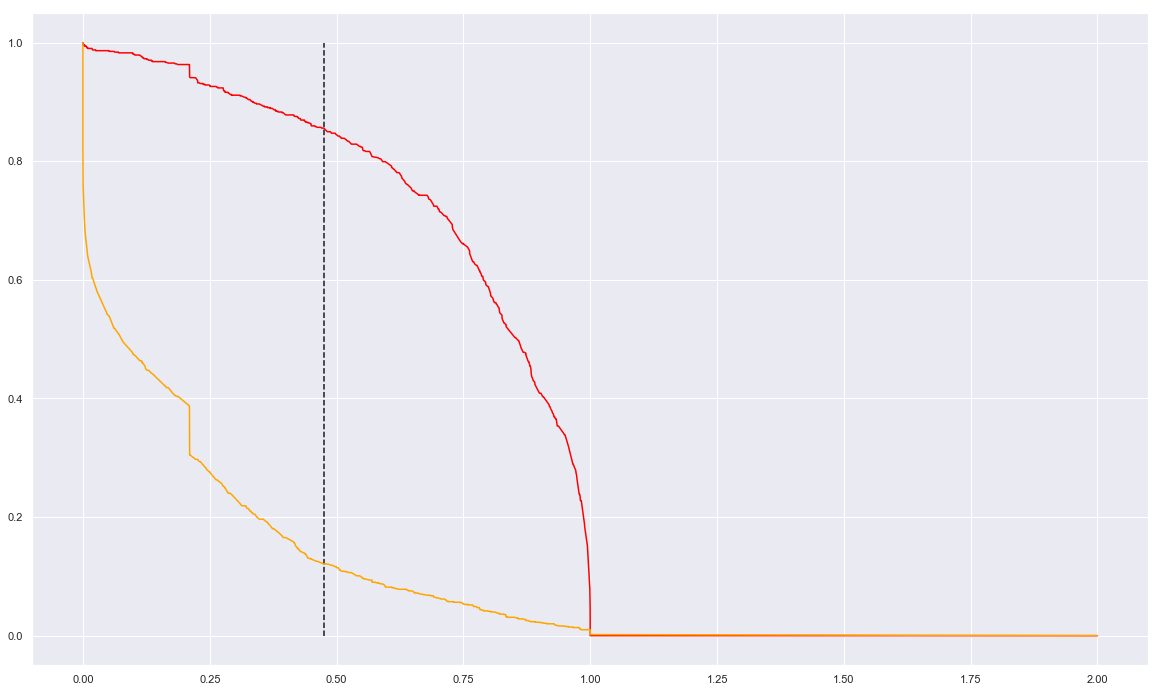

In [15]:
plt.figure(figsize=(20,12))
plt.plot(_, tpr, c="red")
plt.plot(_, fpr, c="orange")
plt.vlines(optimal_threshold, 0, 1, linestyles="dashed")

In [16]:
roc_auc_score(ytest, test_pred[:, 1])

0.9258088893864757

# Class imbalance

In [17]:
#wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
wine_df = pd.read_csv("wine.csv")

In [18]:
wine_df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
104            7.2             0.490         0.24             2.2      0.070   
90             7.9             0.520         0.26             1.9      0.079   
235            7.2             0.630         0.00             1.9      0.097   
532           11.9             0.380         0.49             2.7      0.098   
400            6.6             0.735         0.02             7.9      0.122   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
104                  5.0                  36.0  0.99600  3.33       0.48   
90                  42.0                 140.0  0.99640  3.23       0.54   
235                 14.0                  38.0  0.99675  3.37       0.58   
532                 12.0                  42.0  1.00040  3.16       0.61   
400                 68.0                 124.0  0.99940  3.47       0.53   

     alcohol  quality  
104      9.4        5  
90       9.5        5  
235      9.0        6  
532     10.3        5  
400      9.9        5

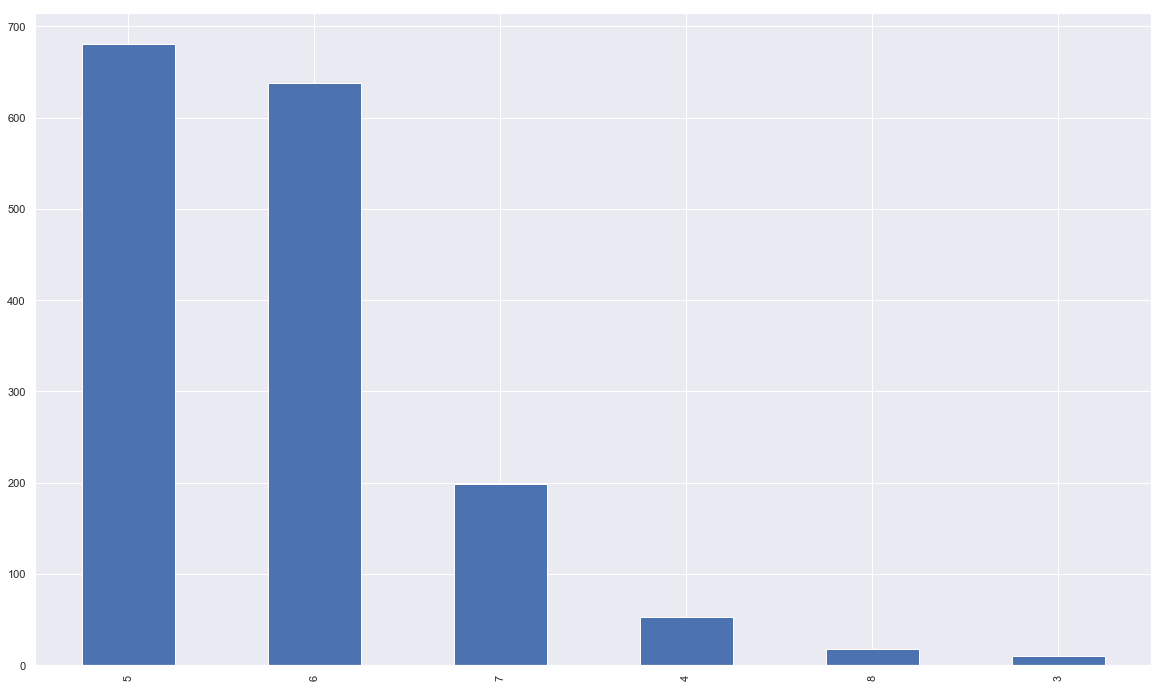

In [19]:
wine_df.quality.value_counts().plot(kind="bar", figsize=(20,12))

## Transforming problem to binary prediciton

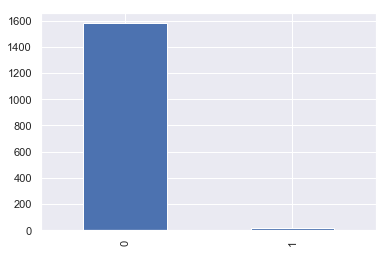

In [20]:
wine_df['quality'] = [1 if q >= 8 else 0 for q in wine_df.quality ]
wine_df.quality.value_counts().plot(kind="bar")

In [21]:
X = wine_df.drop('quality', axis =1)
y = wine_df.quality

In [22]:
# I should have standardised features but here I am using tiny regularisation so it should not matter
model = LogisticRegression(C=100, solver='liblinear') 
y_pred = cross_val_predict(model, X, y, cv = 5)
model.fit(X,y)
y_prob = model.predict_proba(X)

## Model Evaluation.

***When there is class imbalance using roc_auc do not make sense, it is better to use precis. curve***

AUC:  0.8747979478529764


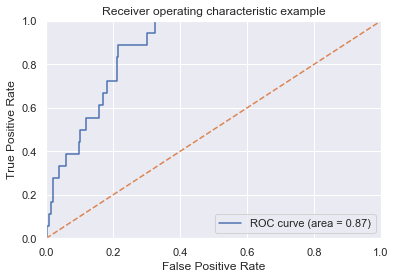

In [23]:
y_probabilities = cross_val_predict(model, X, y, method='predict_proba', cv = 5)
y_pred = cross_val_predict(model, X, y, method='predict', cv = 5)
get_auc(y, y_probabilities, ["Bad/Average Wine", "Great Wine"], column=1, plot=True) # Help function

In [24]:
precision, recall, thresholds = precision_recall_curve(y, y_probabilities[:, 1])

Max F1. Score Threshold: 0.5145672185823509
Max F1.: 0.18867924528301885


/Users/guneykan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/guneykan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/guneykan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


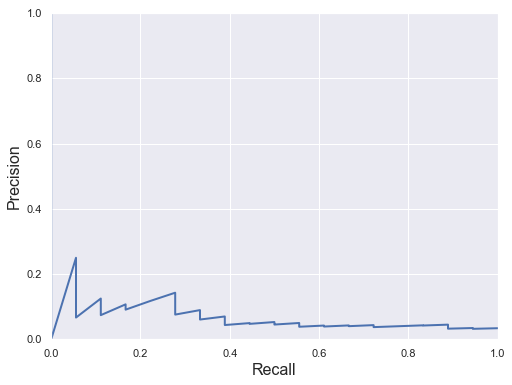

In [25]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.vlines(recalls[np.argmax(2*(precisions * recalls)/(precisions+recalls))], 0, 1, linestyles="dashed")
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    print("Max F1. Score Threshold:", thresholds[np.argmax(2*(precisions * recalls)/(precisions+recalls))])
    print("Max F1.:", max(2*(precisions * recalls)/(precisions+recalls)))
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precision, recall)

In [26]:
from sklearn.metrics import accuracy_score
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Accuracy (cross-validated):  0.9868667917448405
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1581
           1       0.00      0.00      0.00        18

    accuracy                           0.99      1599
   macro avg       0.49      0.50      0.50      1599
weighted avg       0.98      0.99      0.98      1599



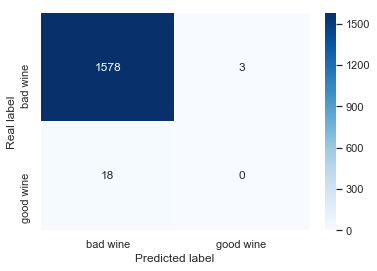

In [27]:
cm = confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, ["bad wine", "good wine"])

## Some approaches to class imbalance

### Retrospective studies

Collect data not as a *representative* sample from the population of interest, but oversample the rare class; for example from your medical database choose a sample of $n/2$ patients with the rare disease and $n/2$ without

On the basis of this *biased (non-representative)* sample train a probabilistic classifier, e.g., logistic regression 

The estimated learning function is biased too - it will predict way larger probability of class=1 

Which corresponds to resampling in data collection.

### Resample Approach.

There are at least two ways to do proper inference with the non-representative sample. 

Lets say that $q(y)$ are the probabilities of the two classes in the population of interest meaning it is the prob. in the data-set before we resample it, i.e., $q(1), q(0)$. And $r(y)$ are the probabilities with which we have sampled, after the resampling, bias probs.


+ One is to change the loss function: instead of using the log-likelihood, which is an *arithmetic average* of individual log-densities, use a *weighted average*

  Some math shows that the following is a valid choice: 
  
  $$ L(\bb) = \sum_i {q(y_i) \over r(y_i)} \left [\log (1+e^{-f(\bx_i,\bb)}) + y_i f(\bx_i,\bb)\right ] $$
  
+ Another is to run the analysis with the biased sample and the log-likelihood loss, but then rescale the estimated probabilities

  Some math shows that if $\pi(y_i)$ are the probabilities estimated by the model, they should be changed to 
  
  $$ { \pi(y_i) {q(y_i) \over r(y_i)} \over \pi(1) {q(1) \over r(1)} + \pi(0) {q(0) \over r(0)}}$$
  
  Lets understand what is the effect of this weighting: consider very small and very large predicted $\pi_i$
  
 + $\pi(y_i)$ -> Prob. obtained by the model
 + $q(y_i)$ -> Prob. in the original data-set
 + $r(y_i)$ -> Prob. of the classes after the resampling, below example it is 0.5.

Any of these approaches needs to be combined with one of the bias-correction approaches developed above

Some tools in `sklearn` to do this are, e.g., the module `imblearn` and its methods `.over_sampling`, e.g. `RandomOverSampler` and `SMOTE`. `imblearn` requires installing - do not do this now! Analogous result to `.over_sampling` is obtained using `LogisticRegression`  `class_weight="balanced"` argument, that corresponds to oversampling


***Getting Prob. predicitons with resampling***

In [28]:
model = LogisticRegression(C=100, class_weight='balanced', solver='liblinear') #balanced imblearn's over_sampling
model.fit(X,y)
y_prob_imb = model.predict_proba(X)
y_pred_imb = cross_val_predict(model, X, y, cv=5)
wine_df_original = pd.read_csv("wine.csv") # getting original data for comparison between classes
wine_df_original["pred_prob"] = y_prob[:,1] # probs of good wine without resampling
wine_df_original["pred_prob_imb"] = y_prob_imb[:,1] #probs of good wine after resampling

***Implenting rescale method above for the correction of bias in the resampled probs.***

In [29]:
q1 = y.sum()/len(y) # prob. of class 1 in our sample
r1 = 0.5

def reweight(pi,q1=0.5,r1=0.5):
    r0 = 1-r1
    q0 = 1-q1
    tot = pi*(q1/r1)+(1-pi)*(q0/r0)
    w = pi*(q1/r1)
    w /= tot
    return w

***correcting for biased sample, note that because we use apply function here we dont specify "pi" in the args, function directly applied to "pi" which is bias probs.***

In [30]:
wine_df_original["pred_prob_imb_corr"] = wine_df_original["pred_prob_imb"].apply(reweight,args=(q1,r1))

***Note that initial model "pred_prob" we never go over prob. 0.5 thus we predict everything "0". Second case prob. way too high. Last case when we remove the bias we see small improvement compared to first case*** 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22deeac8>,
      dtype=object)

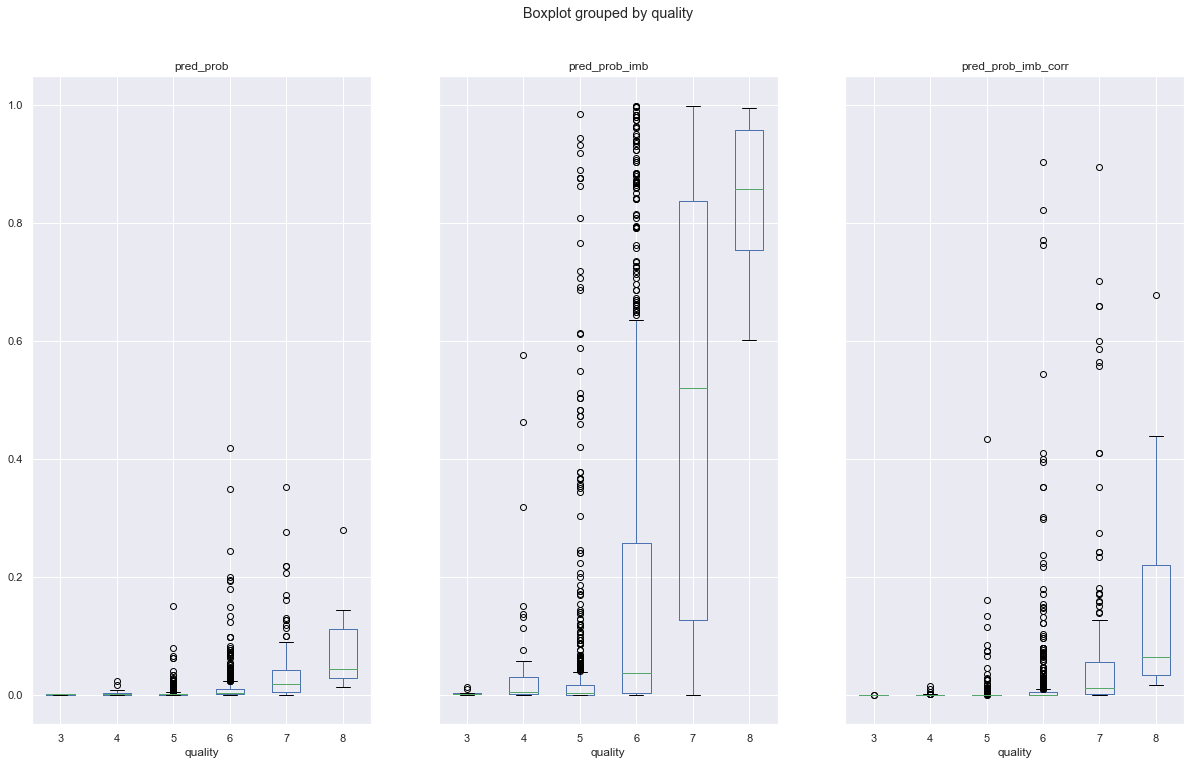

In [31]:
wine_df_original.boxplot(["pred_prob","pred_prob_imb","pred_prob_imb_corr"],by="quality",layout=(1,3), figsize=(20,12))

In [32]:
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred_imb))
print(classification_report(y, y_pred_imb))

Accuracy (cross-validated):  0.851782363977486
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1581
           1       0.05      0.67      0.09        18

    accuracy                           0.85      1599
   macro avg       0.52      0.76      0.51      1599
weighted avg       0.98      0.85      0.91      1599



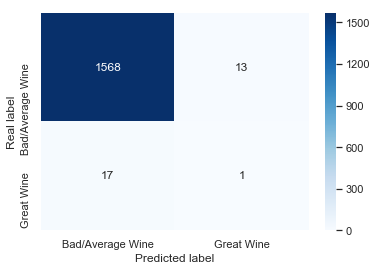

Accuracy (cross-validated):  0.9812382739212008
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1581
           1       0.07      0.06      0.06        18

    accuracy                           0.98      1599
   macro avg       0.53      0.52      0.53      1599
weighted avg       0.98      0.98      0.98      1599



In [33]:
y_pred_new = [1 if pi >= 0.5 else 0 for pi in wine_df_original["pred_prob_imb_corr"] ]

#confusion matrix
cm =  confusion_matrix(y_pred=y_pred_new, y_true=y, labels=[0,1])
plot_confusion_matrix(cm, ["Bad/Average Wine", "Great Wine"])
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred_new))
print(classification_report(y, y_pred_new))

## Multinomial-logistic regression

We need to map the probabilities $\pi_{ij}$ to the input $\bx_i$. One way that collapses to logistic regression when $K=2$ is to take:

$$\log{\pi_{ij} \over \pi_{i1}} = f(\bx_i,\bb_j)$$

The model definition implies

$$\pi_{ij} = {e^{f(\bx_i,\bb_j)} \over 1+ \sum_{k>1} e^{f(\bx_i,\bb_k)}}$$

and you should check that for $K=2$ this is precisely logistic regression. The pivot category is taken above to be 1, but any other can be chosen - this only affects the interpretation of the results. Note also that we have different parameters $\bb_j$ for each category $j$.

Another approach is one-vs-all, OvA, under the hood sklearn trains a classifier for each class. Meaning each classifier outsputs a prob. class being 0, 1, 2 and so on, in the end outputs the prediction that got the highest score from all classifiers. In wine example we have 6 different classes, we train 6 different classifier and we get a prob. from each one, we take the output of classifiers that outputs the highest prob. as our prediction.

Where in Multinomial-logistic regression, we use cross-ent. loss and we train only one classifier.

In [34]:
wine_df_original.quality.unique()

array([5, 6, 7, 4, 8, 3])

***For multinomial-logistic regression we just need to say the function that is multin.***

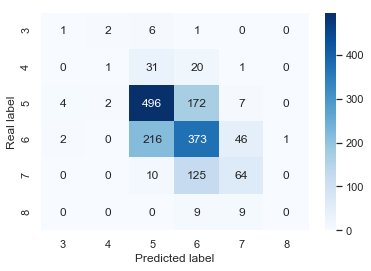

In [35]:
wine_df = pd.read_csv("wine.csv")
X = wine_df.drop(["quality"], axis=1)
y = wine_df["quality"]
mod = LogisticRegression(C=100, multi_class="multinomial", solver="newton-cg", max_iter=10000)
mod.fit(X, y)
y_prob = cross_val_predict(mod, X, y, method="predict_proba", cv=5)
y_pred = cross_val_predict(mod, X, y, cv=5)
cm = confusion_matrix(y, y_pred, labels=[3, 4, 5, 6, 7, 8])
plot_confusion_matrix(cm, class_labels=["3", "4", "5", "6", "7", "8"])


In [36]:
print(classification_report(y, y_pred))
print(accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           3       0.14      0.10      0.12        10
           4       0.20      0.02      0.03        53
           5       0.65      0.73      0.69       681
           6       0.53      0.58      0.56       638
           7       0.50      0.32      0.39       199
           8       0.00      0.00      0.00        18

    accuracy                           0.58      1599
   macro avg       0.34      0.29      0.30      1599
weighted avg       0.56      0.58      0.57      1599

0.5847404627892433


+ When the output is multicategorical is way more sensible to build directly a model for the original output than first turn it (more or less arbitrarily) into a binary output. Even if for commercial/interpretability purposes a binary prediction is preferred, is preferrable to turn the multicategorical prediction into binary rather than the multicategorical output to binary and build a model

# Programming project: forest cover classification

In this project, you have to predict the class of forest cover (the predominant kind of tree cover) from strictly cartographic and environment variables.

The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains categorical data for qualitative independent variables (wilderness areas and soil types).

You have further details on the data at *covertype.info* file and at https://archive.ics.uci.edu/ml/datasets/Covertype

Be aware that the final dataset has been slighly modified from the original source data.

As performance metric, you can use *AUC* in the binary classification case. For multi-class classification, check as well the confussion matrix and estimate the misclassification probabilities of different classes(check *metrics.confusion_matrix* and *metrics.classification_report* in *sklearn*).

+ Using *MultiClass_Train.csv* file build a predictive model for *Cover_Type* .
+ Try a first a binary classification to predict class #7 (Krummholz, https://en.wikipedia.org/wiki/Krummholz), which is a rare valuable habitat. After that, then try multi-variate classification to predict all classes.
+ For this analysis there is an extra test dataset. Once your code is submitted we will run a competition to see how you score in the test data. Hence have prepared also the necessary script to compute the accuracy estimate on the test data once released.

You can follow those **steps** in your first implementation:
1. *Explore* and understand the dataset. 
2. Create *dummy variables* for relevant categorical features
3. Reformat the Class_type variable into a binary one, being class #7 the target variable versus the others.
4. *Build* an initial binary model for class #7 versus the other ones and test it on the same input data. Try to improve it using methods to tackle class imbalance.
5. Assess expected accuracy using *cross-validation*
6. Report which variable impacts more on results 
7. Repeat 4., 5., 6. now with a multi-class model
8. Prepare the code to *run* on a new input file and be able to report accuracy, following same preparation steps (missing data, dummies, etc)


In [5]:
df = pd.read_csv("MultiClass_Train.csv")
df.head()

Elevation  Aspect  Slope  Horiz_dist_hydro  Vertical_dist_hydro  \
0       3302       5     22               350                   75   
1       3609     121     21               845                  390   
2       3112     109     12               283                  -70   
3       3133     298      8               182                    6   
4       2694     330      9                90                    0   

   Horiz_dist_roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 1718            185             190            136   
1                 2701            250             217             84   
2                 1869            241             226            113   
3                 3569            198             237            180   
4                  765            199             229            170   

   Horiz_dist_firepoints  Cover_Type  Wilderness_Area  Soil_Type  
0                   2940           1                1         39  
1                    939           1                1         40  
2                   1463           1                1         29  
3                   1158           1                1         29  
4                   1358           1                1         12

## Checking for NaNs

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174305 entries, 0 to 174304
Data columns (total 13 columns):
Elevation                174305 non-null int64
Aspect                   174305 non-null int64
Slope                    174305 non-null int64
Horiz_dist_hydro         174305 non-null int64
Vertical_dist_hydro      174305 non-null int64
Horiz_dist_roadways      174305 non-null int64
Hillshade_9am            174305 non-null int64
Hillshade_Noon           174305 non-null int64
Hillshade_3pm            174305 non-null int64
Horiz_dist_firepoints    174305 non-null int64
Cover_Type               174305 non-null int64
Wilderness_Area          174305 non-null int64
Soil_Type                174305 non-null int64
dtypes: int64(13)
memory usage: 17.3 MB


## Stats. of the data

In [39]:
df.describe()

Elevation         Aspect          Slope  Horiz_dist_hydro  \
count  174305.000000  174305.000000  174305.000000     174305.000000   
mean     2959.208164     155.620137      14.090973        269.631749   
std       280.515170     111.929309       7.488133        212.773079   
min      1859.000000       0.000000       0.000000          0.000000   
25%      2809.000000      59.000000       9.000000        108.000000   
50%      2996.000000     127.000000      13.000000        218.000000   
75%      3164.000000     261.000000      18.000000        390.000000   
max      3858.000000     360.000000      65.000000       1376.000000   

       Vertical_dist_hydro  Horiz_dist_roadways  Hillshade_9am  \
count        174305.000000        174305.000000  174305.000000   
mean             46.313273          2349.574028     212.232805   
std              58.099343          1561.936117      26.762193   
min            -164.000000             0.000000       0.000000   
25%               7.000000          1103.000000     198.000000   
50%              30.000000          1991.000000     218.000000   
75%              69.000000          3331.000000     231.000000   
max             598.000000          7097.000000     254.000000   

       Hillshade_Noon  Hillshade_3pm  Horiz_dist_firepoints     Cover_Type  \
count   174305.000000  174305.000000          174305.000000  174305.000000   
mean       223.305493     142.418898            1981.250016       2.050721   
std         19.713005      38.310085            1325.285140       1.394968   
min          0.000000       0.000000               0.000000       1.000000   
25%        213.000000     119.000000            1022.000000       1.000000   
50%        226.000000     143.000000            1710.000000       2.000000   
75%        237.000000     168.000000            2551.000000       2.000000   
max        254.000000     254.000000            7150.000000       7.000000   

       Wilderness_Area      Soil_Type  
count    174305.000000  174305.000000  
mean          2.114959      24.360638  
std           1.061840       9.487250  
min           1.000000       1.000000  
25%           1.000000      20.000000  
50%           2.000000      29.000000  
75%           3.000000      31.000000  
max           4.000000      40.000000

## Linear Relationships.

In [40]:
corr_matrix = df.corr()
corr_matrix["Cover_Type"].sort_values(ascending=False)

Cover_Type               1.000000
Wilderness_Area          0.278752
Slope                    0.151717
Vertical_dist_hydro      0.083914
Aspect                   0.018283
Horiz_dist_hydro        -0.020197
Hillshade_9am           -0.039821
Hillshade_3pm           -0.045939
Hillshade_Noon          -0.098383
Horiz_dist_firepoints   -0.111548
Horiz_dist_roadways     -0.155414
Soil_Type               -0.168711
Elevation               -0.274151
Name: Cover_Type, dtype: float64

In [41]:
df[["Cover_Type", "Wilderness_Area", "Slope", "Horiz_dist_firepoints", "Horiz_dist_roadways", 
    "Soil_Type", "Elevation"]].corr().style.background_gradient(cmap="coolwarm")

## Identifying Cat. Variables.

In [42]:
df.nunique()

Elevation                1860
Aspect                    361
Slope                      58
Horiz_dist_hydro          513
Vertical_dist_hydro       602
Horiz_dist_roadways      5535
Hillshade_9am             199
Hillshade_Noon            164
Hillshade_3pm             255
Horiz_dist_firepoints    5566
Cover_Type                  7
Wilderness_Area             4
Soil_Type                  40
dtype: int64

## Checking if there is class imbalance

In [43]:
df.groupby('Cover_Type').size()

Cover_Type
1    63586
2    84957
3    10728
4      830
5     2864
6     5253
7     6087
dtype: int64

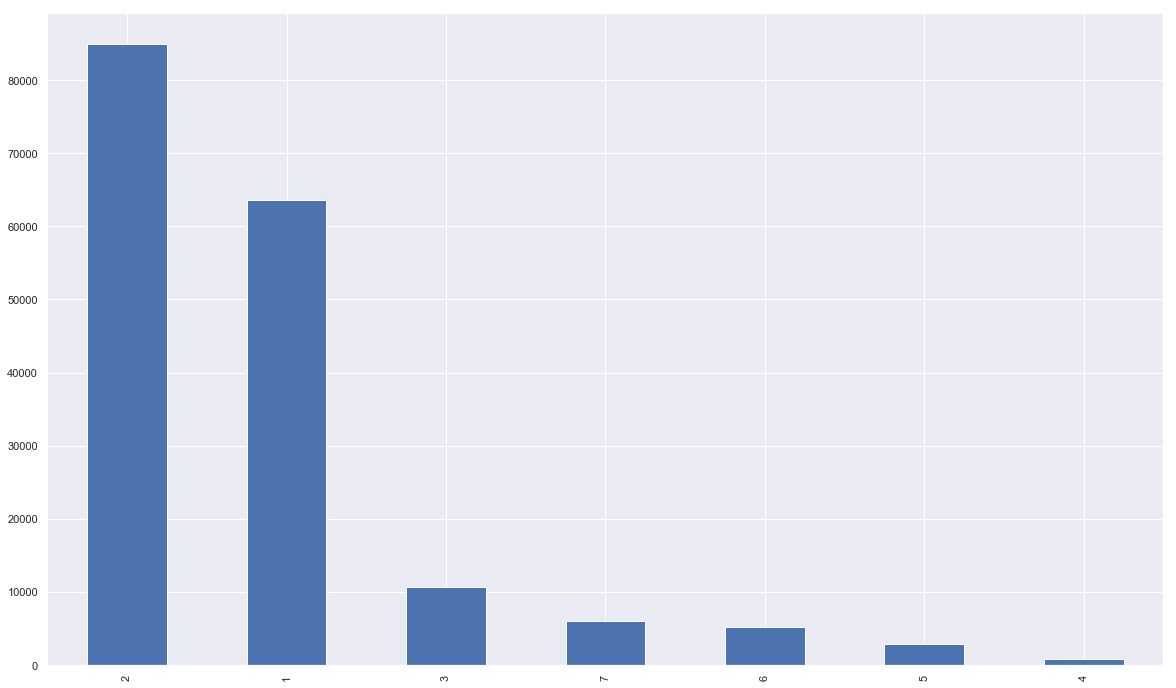

In [44]:
df["Cover_Type"].value_counts().plot(kind="bar", figsize=(20,12))

## Before further stuff, just fit a base model and see if we can imrpve on it

### One hot Encode categorical features

***Note that Auto. drops type 1 for variables as base case, it is important for linear models***

In [45]:
pd.options.display.max_columns=300
train_data = pd.get_dummies(df, drop_first=True, columns=["Wilderness_Area", "Soil_Type"])

### Checking if there is a dummy with 0 std, if there was we can just drop it, if there is no variation just drop it

In [46]:
train_data.describe()

Elevation         Aspect          Slope  Horiz_dist_hydro  \
count  174305.000000  174305.000000  174305.000000     174305.000000   
mean     2959.208164     155.620137      14.090973        269.631749   
std       280.515170     111.929309       7.488133        212.773079   
min      1859.000000       0.000000       0.000000          0.000000   
25%      2809.000000      59.000000       9.000000        108.000000   
50%      2996.000000     127.000000      13.000000        218.000000   
75%      3164.000000     261.000000      18.000000        390.000000   
max      3858.000000     360.000000      65.000000       1376.000000   

       Vertical_dist_hydro  Horiz_dist_roadways  Hillshade_9am  \
count        174305.000000        174305.000000  174305.000000   
mean             46.313273          2349.574028     212.232805   
std              58.099343          1561.936117      26.762193   
min            -164.000000             0.000000       0.000000   
25%               7.000000          1103.000000     198.000000   
50%              30.000000          1991.000000     218.000000   
75%              69.000000          3331.000000     231.000000   
max             598.000000          7097.000000     254.000000   

       Hillshade_Noon  Hillshade_3pm  Horiz_dist_firepoints     Cover_Type  \
count   174305.000000  174305.000000          174305.000000  174305.000000   
mean       223.305493     142.418898            1981.250016       2.050721   
std         19.713005      38.310085            1325.285140       1.394968   
min          0.000000       0.000000               0.000000       1.000000   
25%        213.000000     119.000000            1022.000000       1.000000   
50%        226.000000     143.000000            1710.000000       2.000000   
75%        237.000000     168.000000            2551.000000       2.000000   
max        254.000000     254.000000            7150.000000       7.000000   

       Wilderness_Area_2  Wilderness_Area_3  Wilderness_Area_4    Soil_Type_2  \
count      174305.000000      174305.000000      174305.000000  174305.000000   
mean            0.051071           0.436052           0.063928       0.012742   
std             0.220144           0.495895           0.244626       0.112159   
min             0.000000           0.000000           0.000000       0.000000   
25%             0.000000           0.000000           0.000000       0.000000   
50%             0.000000           0.000000           0.000000       0.000000   
75%             0.000000           1.000000           0.000000       0.000000   
max             1.000000           1.000000           1.000000       1.000000   

         Soil_Type_3    Soil_Type_4    Soil_Type_5    Soil_Type_6  \
count  174305.000000  174305.000000  174305.000000  174305.000000   
mean        0.008439       0.020814       0.002972       0.011032   
std         0.091477       0.142762       0.054433       0.104454   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type_7    Soil_Type_8    Soil_Type_9   Soil_Type_10  \
count  174305.000000  174305.000000  174305.000000  174305.000000   
mean        0.000161       0.000384       0.002054       0.056728   
std         0.012673       0.019602       0.045273       0.231323   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        Soil_Type_11   Soil_Type_12   Soil_Type_13   Soil_Type_14  \
count  174305.000000 

In [47]:
train_data.head()

Elevation  Aspect  Slope  Horiz_dist_hydro  Vertical_dist_hydro  \
0       3302       5     22               350                   75   
1       3609     121     21               845                  390   
2       3112     109     12               283                  -70   
3       3133     298      8               182                    6   
4       2694     330      9                90                    0   

   Horiz_dist_roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 1718            185             190            136   
1                 2701            250             217             84   
2                 1869            241             226            113   
3                 3569            198             237            180   
4                  765            199             229            170   

   Horiz_dist_firepoints  Cover_Type  Wilderness_Area_2  Wilderness_Area_3  \
0                   2940           1                  0                  0   
1                    939           1                  0                  0   
2                   1463           1                  0                  0   
3                   1158           1                  0                  0   
4                   1358           1                  0                  0   

   Wilderness_Area_4  Soil_Type_2  Soil_Type_3  Soil_Type_4  Soil_Type_5  \
0                  0            0            0            0            0   
1                  0            0            0            0            0   
2                  0            0            0            0            0   
3                  0            0            0            0            0   
4                  0            0            0            0            0   

   Soil_Type_6  Soil_Type_7  Soil_Type_8  Soil_Type_9  Soil_Type_10  \
0            0            0            0            0             0   
1            0            0            0            0             0   
2            0            0            0            0             0   
3            0            0            0            0             0   
4            0            0            0            0             0   

   Soil_Type_11  Soil_Type_12  Soil_Type_13  Soil_Type_14  Soil_Type_15  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             1             0             0             0   

   Soil_Type_16  Soil_Type_17  Soil_Type_18  Soil_Type_19  Soil_Type_20  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_21  Soil_Type_22  Soil_Type_23  Soil_Type_24  Soil_Type_25  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_26  Soil_Type_27  Soil_Type_28  Soil_Type_29  Soil_Type_30  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             1             0   
3             0             0             0             1             0   
4             0             0             0             0           

### Seperate features and Standarize them

***Try a first a binary classification to predict class #7 (Krummholz, https://en.wikipedia.org/wiki/Krummholz), which is a rare valuable habitat. After that, then try multi-variate classification to predict all classes.***

In [48]:
z = [0 if a != 7 else 1 for a in train_data["Cover_Type"]]

In [49]:
train_data["Cover_Type"] = np.array(z)


***Notice the class inbalance***

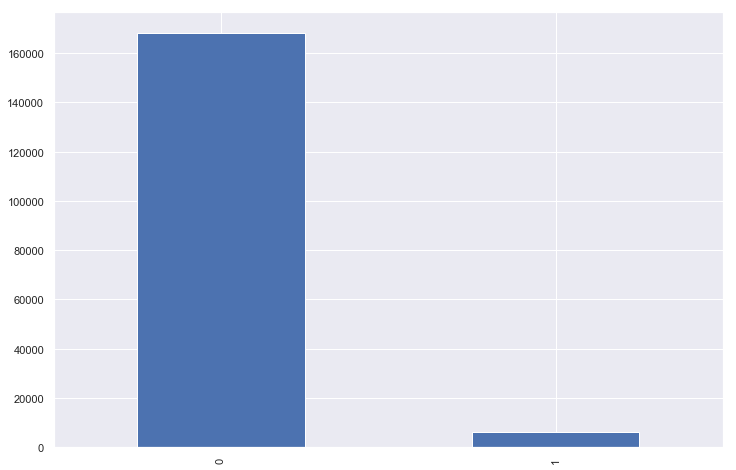

In [50]:
train_data["Cover_Type"].value_counts().plot(kind="bar", figsize=(12,8))

### Resampling and Process

***Prepare the data and the model, we will use imblearn to get prob. in resampled data-set. Start with naive oversampling which is using balanced weight of Logistic Regr. Function***

In [130]:
from imblearn.over_sampling import RandomOverSampler
X = train_data.drop(["Cover_Type"], axis=1).values
y = train_data["Cover_Type"].values.reshape(-1, )
print(X.shape, y.shape)

(174305, 52) (174305,)


In [131]:
print("Prob. in og. data:", len(y[y==1])/len(y))

Prob. in og. data: 0.0349215455666791


***Reweight Function***

$$ { \pi(y_i) {q(y_i) \over r(y_i)} \over \pi(1) {q(1) \over r(1)} + \pi(0) {q(0) \over r(0)}}$$

In [132]:
q1 = len(y[y==1])/len(y)
r1 = 0.5
def rewieght(pi, q1=0.5, r1=0.5):
    w = pi*(q1/r1)
    tot = pi*(q1/r1) + (1-pi)*((1-q1)/(1-r1))
    w /= tot
    return w




In [133]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
X, y = shuffle(X, y, random_state=123)
#scl = MinMaxScaler() # commented for trees
#X = scl.fit_transform(X) # comment out for other models

### Model - Log. Regr.

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
base_model = LogisticRegression(solver="liblinear", max_iter=10000, C=100.0, class_weight="balanced")
base_model.fit(X, y)
y_pred = cross_val_predict(base_model, X, y, cv=5, method="predict_proba")
#y_pred = base_model.predict_proba(X)

In [59]:
correct_prob = pd.DataFrame(y_pred[:, 1]).apply(reweight, args=(q1, r1))
correct_prob_0 = pd.DataFrame(1-correct_prob)

In [60]:
correct_prob = correct_prob.values
correct_prob_0 = correct_prob_0.values
all_prob = np.concatenate((correct_prob_0, correct_prob), axis=1)

### Model - Log. Regr. Evaluation

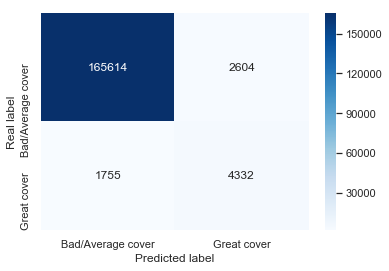

Accuracy (cross-validated):  0.9749921115286423
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    168218
           1       0.62      0.71      0.67      6087

    accuracy                           0.97    174305
   macro avg       0.81      0.85      0.83    174305
weighted avg       0.98      0.97      0.98    174305



In [61]:
y_pred_new = [1 if pi >= 0.01342835297232084 else 0 for pi in correct_prob]

#confusion matrix
cm =  confusion_matrix(y_pred=y_pred_new, y_true=y.reshape(-1,), labels=[0,1])
plot_confusion_matrix(cm, ["Bad/Average cover", "Great cover"])
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred_new))
print(classification_report(y, y_pred_new))

AUC:  0.9788336472639042


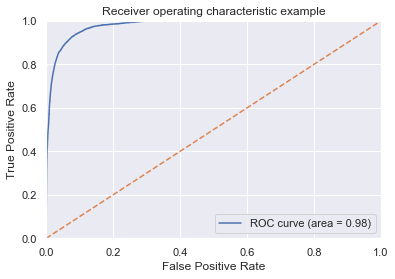

In [62]:
get_auc(y, all_prob, ["0", "1"])

Max F1. Score Threshold: 0.013442736143842074
Max F1.: 0.6653355859315006


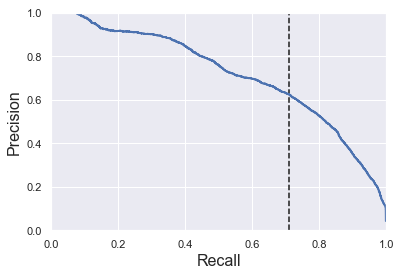

In [63]:
precision, recall, thresholds = precision_recall_curve(y, all_prob[:, 1])
plot_precision_vs_recall(precision, recall)


### Model - Random Forrests

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
tree = RandomForestClassifier(random_state=32, n_estimators=20, class_weight="balanced_subsample")
max_feat = (np.linspace(2, X.shape[1], num=X.shape[1]-1, dtype="int64"))
max_dep = (np.linspace(50, 500, num=100, dtype="int64"))
min_samp = (np.linspace(50, 500, num=300, dtype="int64"))
params = {"max_depth": max_dep, "max_features": max_feat, "min_samples_split": min_samp}
clf = GridSearchCV(tree, params, scoring="f1", cv=2)
clf.fit(X, y)

KeyboardInterrupt: 

In [136]:
tree = RandomForestClassifier(n_estimators=100, class_weight="balanced_subsample")
tree.fit(X, y)

In [138]:
y_pred_prob = cross_val_predict(tree, X, y, cv=2, method="predict_proba")

Max F1. Score Threshold: 0.020809385386779376
Max F1.: 0.911348398311398


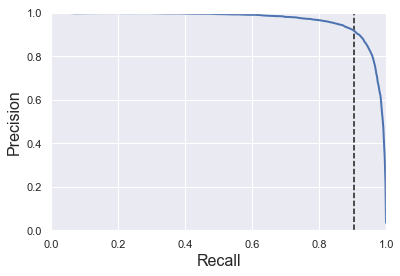

In [139]:
correct_prob = pd.DataFrame(y_pred_prob[:, 1]).apply(reweight, args=(q1, r1))
correct_prob_0 = pd.DataFrame(1-correct_prob)
correct_prob = correct_prob.values
correct_prob_0 = correct_prob_0.values
all_prob = np.concatenate((correct_prob_0, correct_prob), axis=1)
precision, recall, thresholds = precision_recall_curve(y, all_prob[:, 1])
plot_precision_vs_recall(precision, recall)

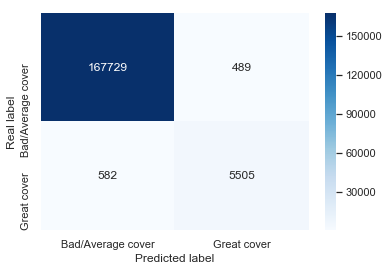

Accuracy (cross-validated):  0.9938555979461289
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168218
           1       0.92      0.90      0.91      6087

    accuracy                           0.99    174305
   macro avg       0.96      0.95      0.95    174305
weighted avg       0.99      0.99      0.99    174305



In [140]:
y_pred_new = [1 if pi >= 0.020809385386779376 else 0 for pi in correct_prob]

#confusion matrix
cm =  confusion_matrix(y_pred=y_pred_new, y_true=y.reshape(-1,), labels=[0,1])
plot_confusion_matrix(cm, ["Bad/Average cover", "Great cover"])
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred_new))
print(classification_report(y, y_pred_new))

## Trying to do better



***To do:***

 + Remove Skewness for linear models
 + Use PCA on highly correlated features
 + Try different encoding methods for categ. features
 + Write a gridsearch function for binary prediction
 + Try to fit XGboost and NNs

### how target related to features

In [64]:
cols=df.columns 

data_corr = df.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(len(cols)): 
    for j in range(i+1,len(cols)): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Hillshade_9am and Hillshade_3pm = -0.78
Elevation and Soil_Type = 0.69
Aspect and Hillshade_3pm = 0.65
Horiz_dist_hydro and Vertical_dist_hydro = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


/Users/guneykan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


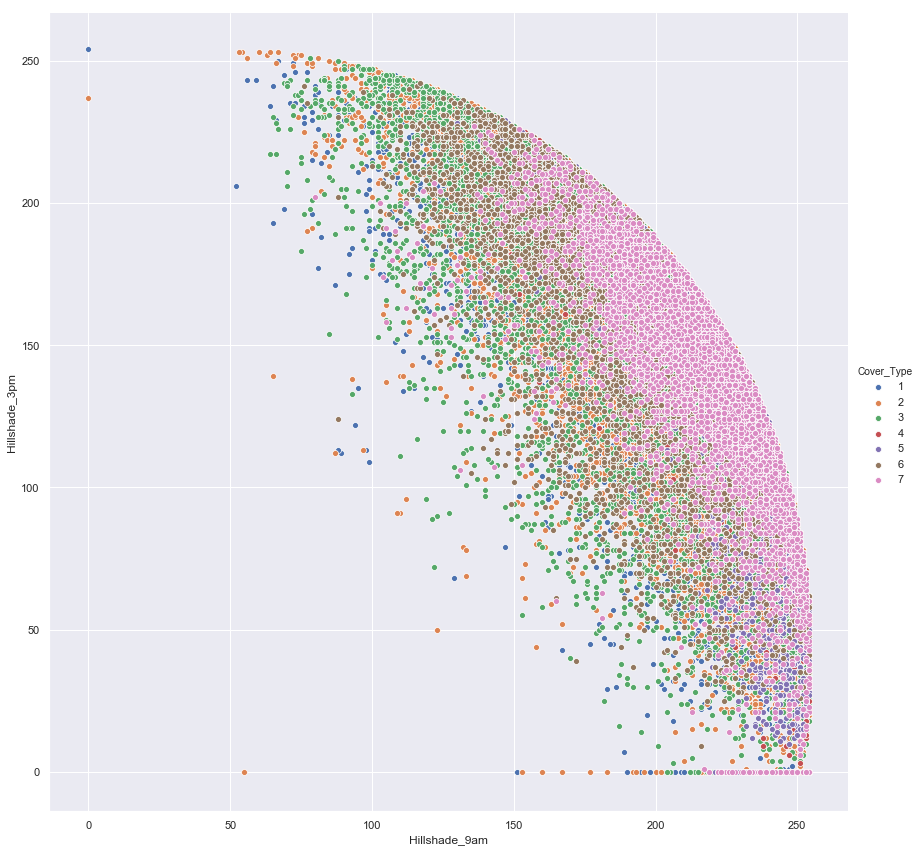

/Users/guneykan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


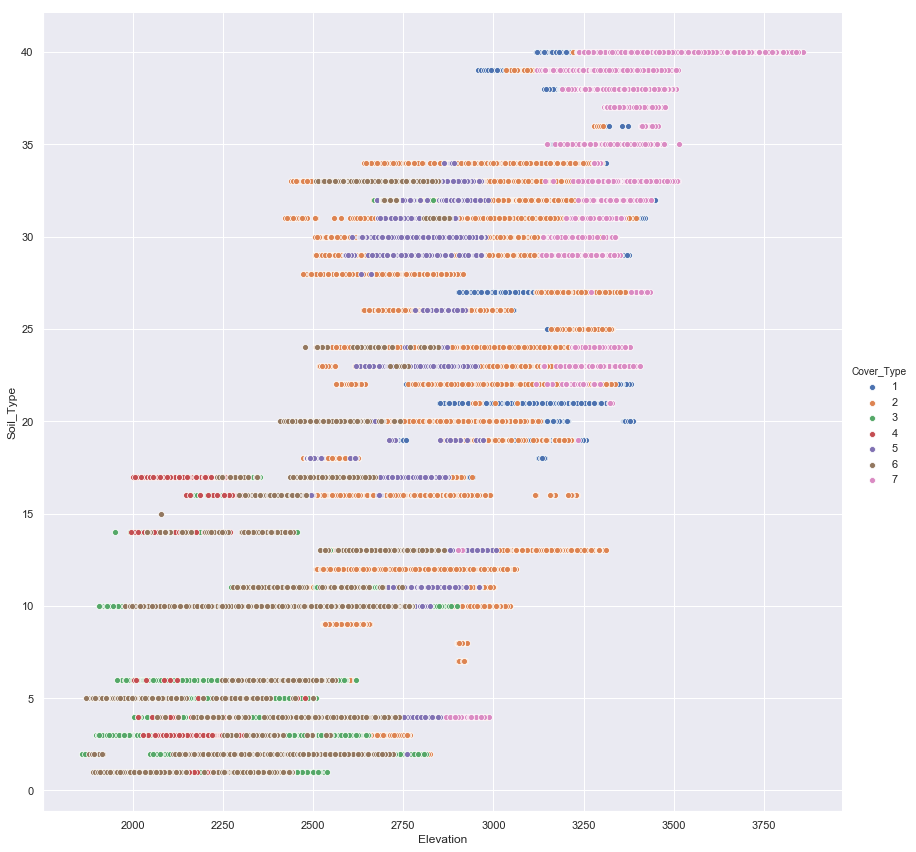

/Users/guneykan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


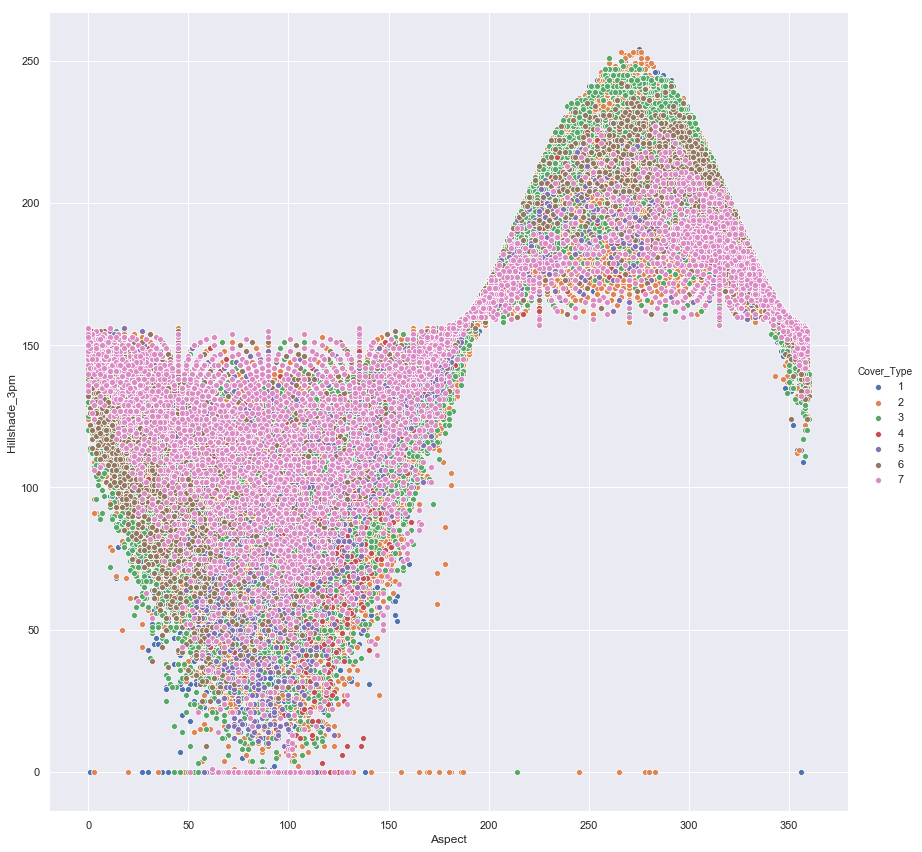

/Users/guneykan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


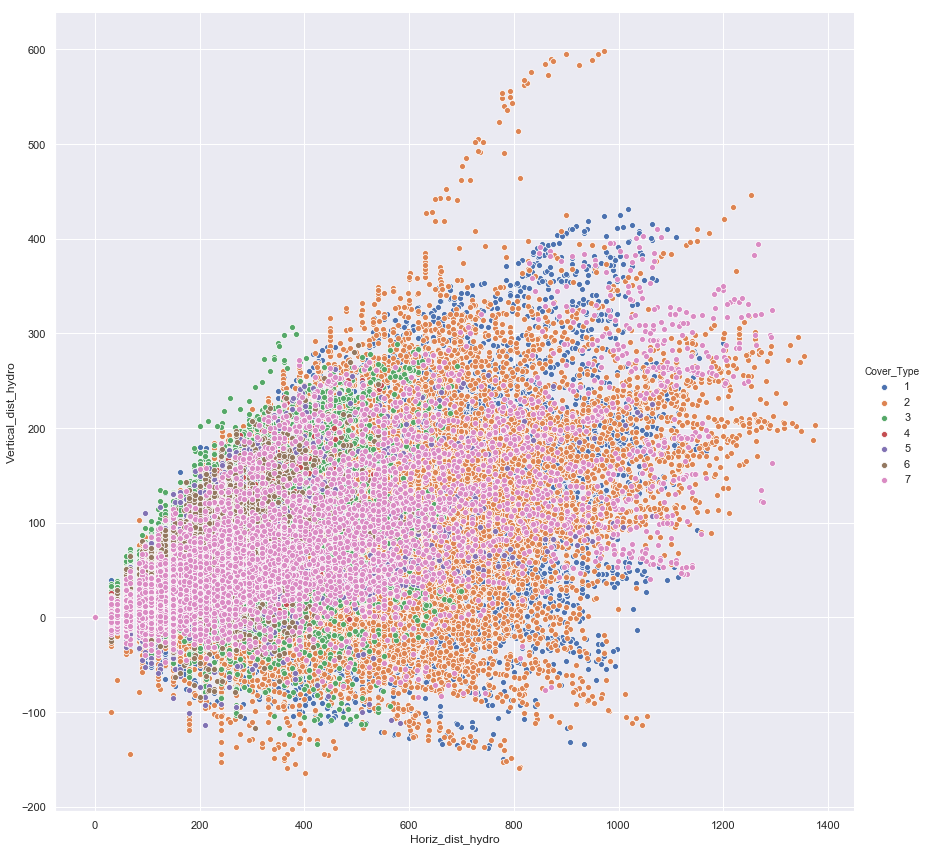

/Users/guneykan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


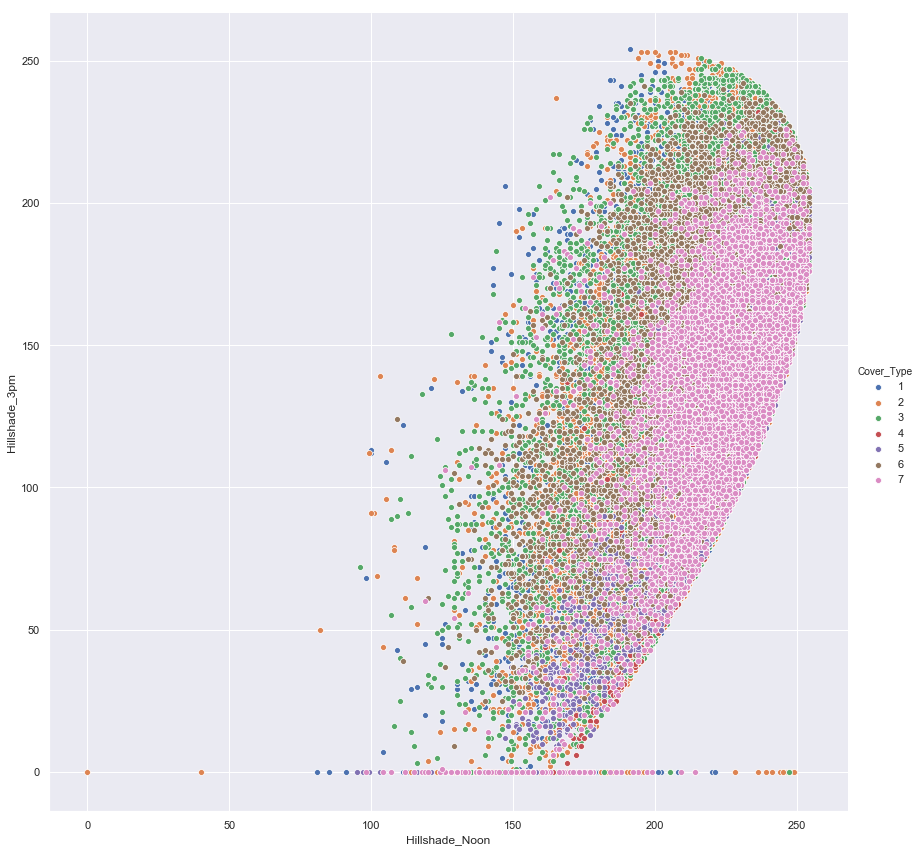

/Users/guneykan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


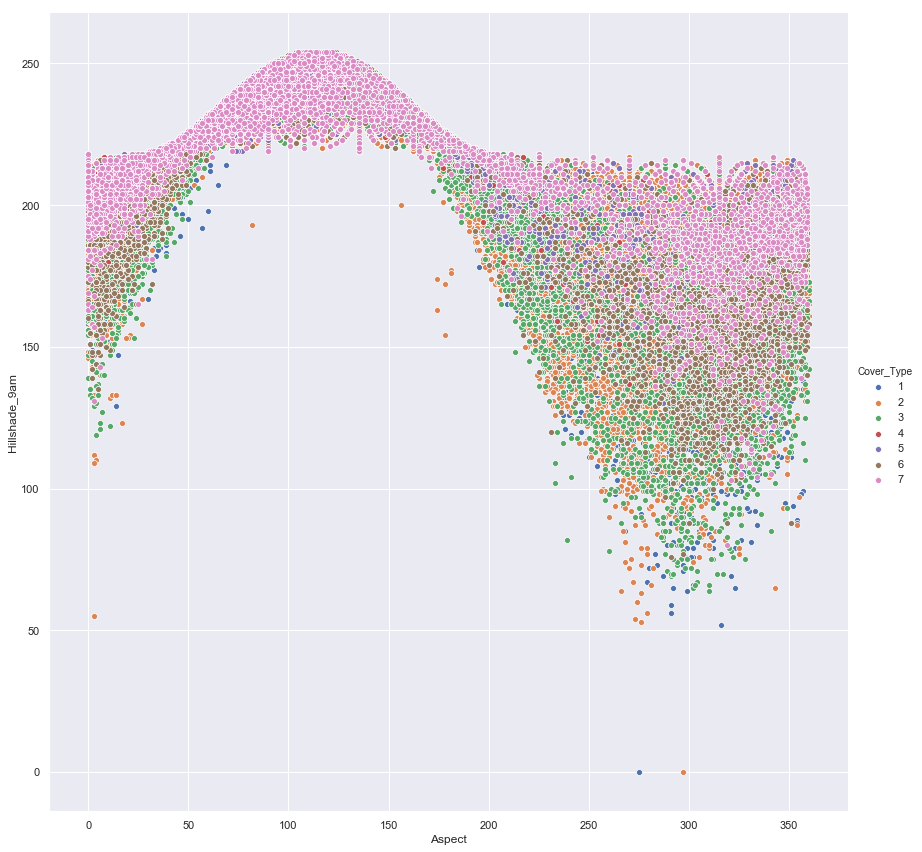

/Users/guneykan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


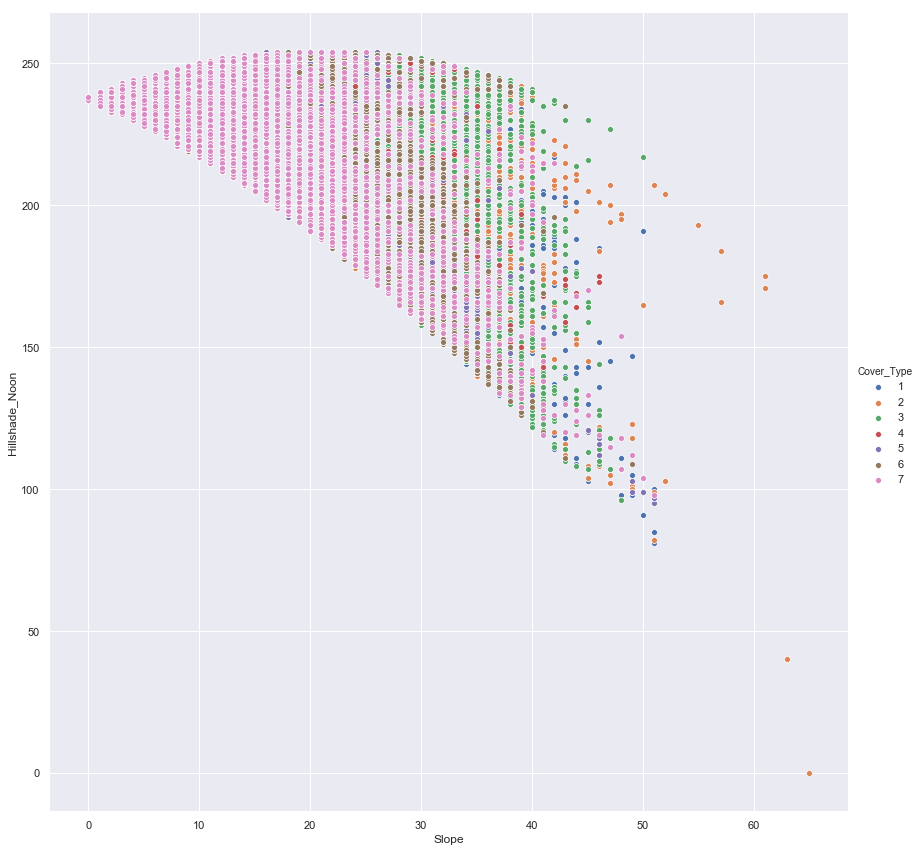

In [65]:
for v,i,j in s_corr_list:
    sns.pairplot(df, hue="Cover_Type", size=12, x_vars=cols[i],y_vars=cols[j])
    plt.show()

### Distrbs.

***We can use sqrt or log transformation for postive skewness***

***square transformation negative skewness***


/Users/guneykan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


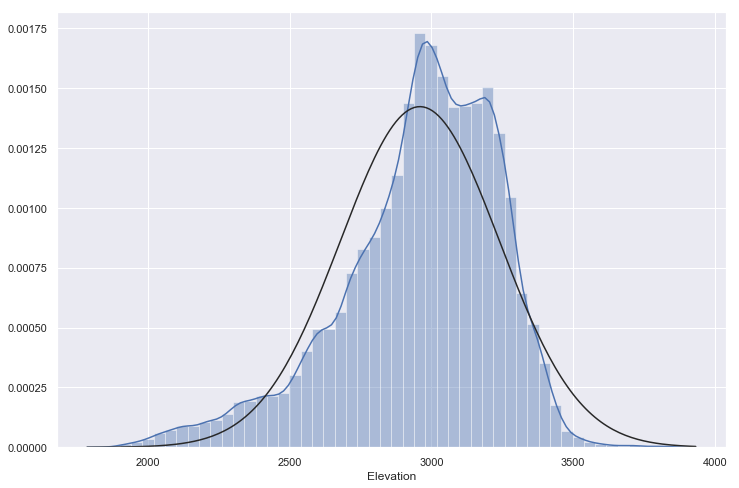

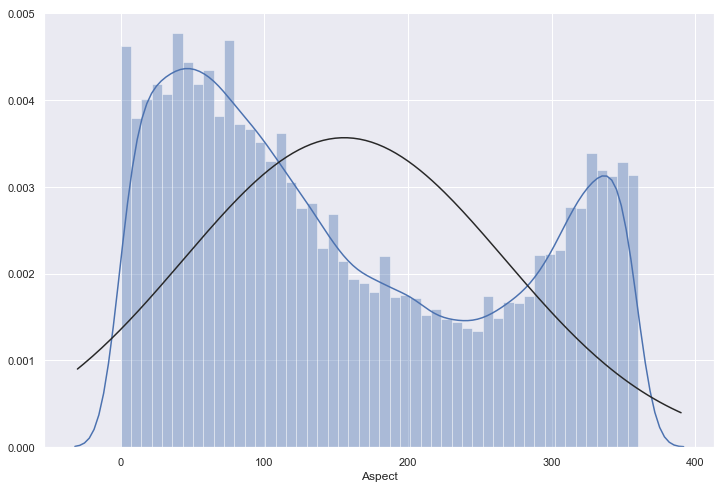

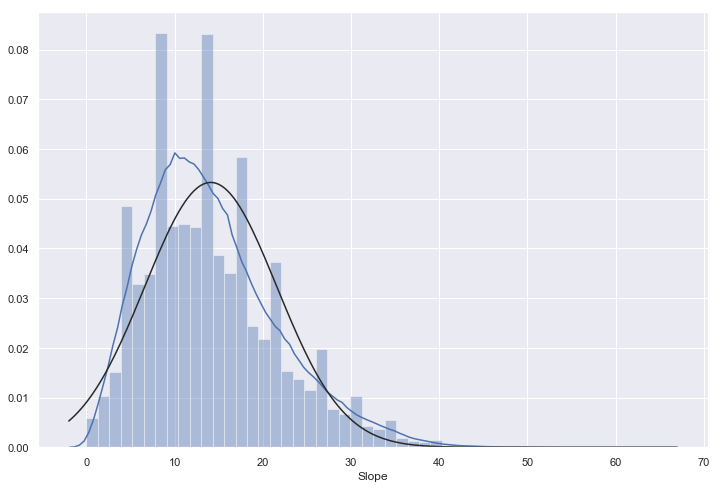

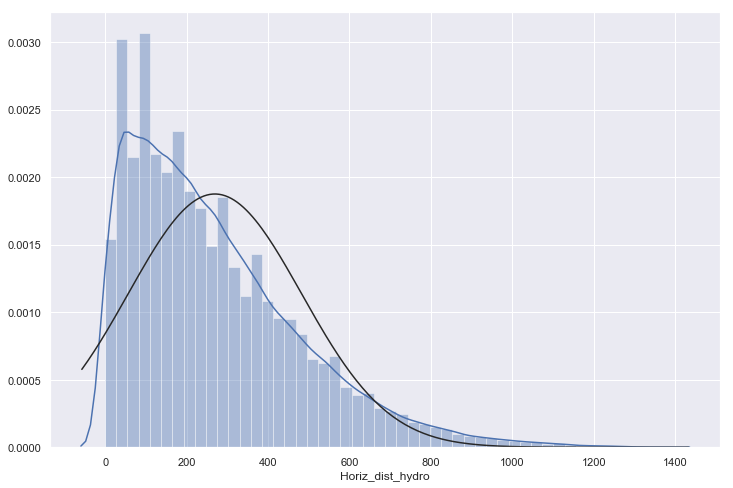

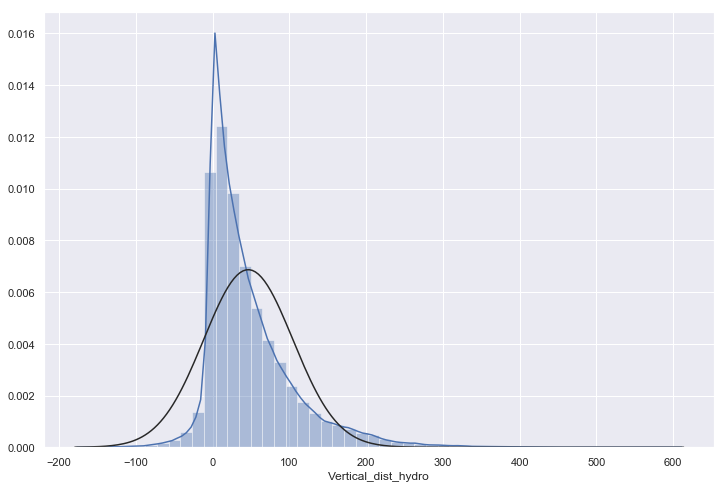

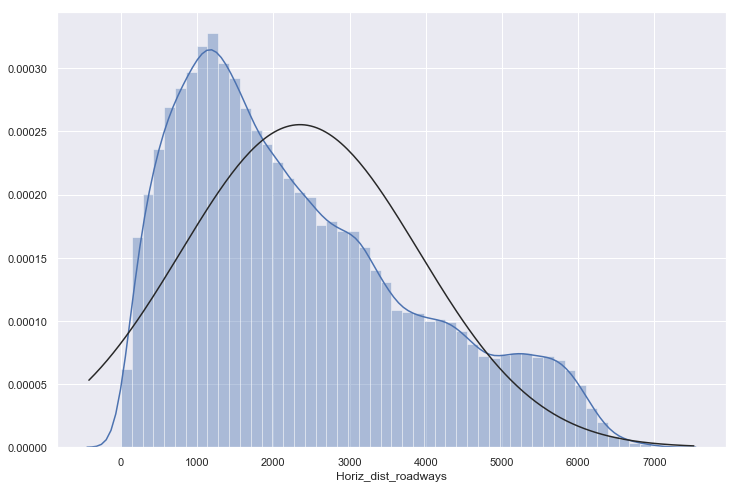

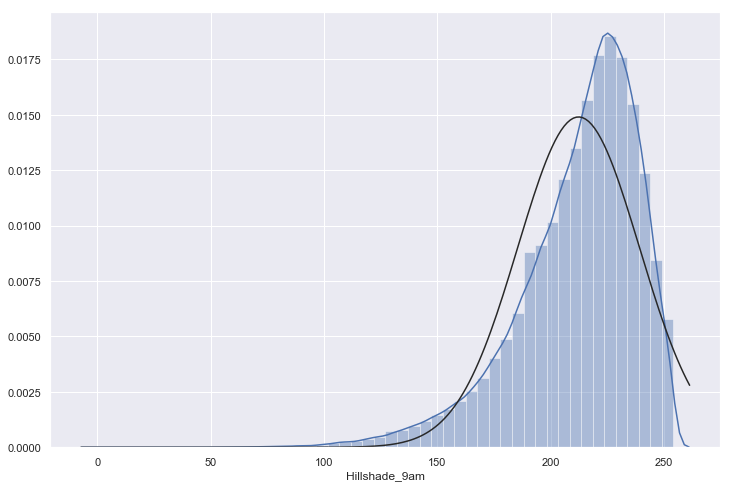

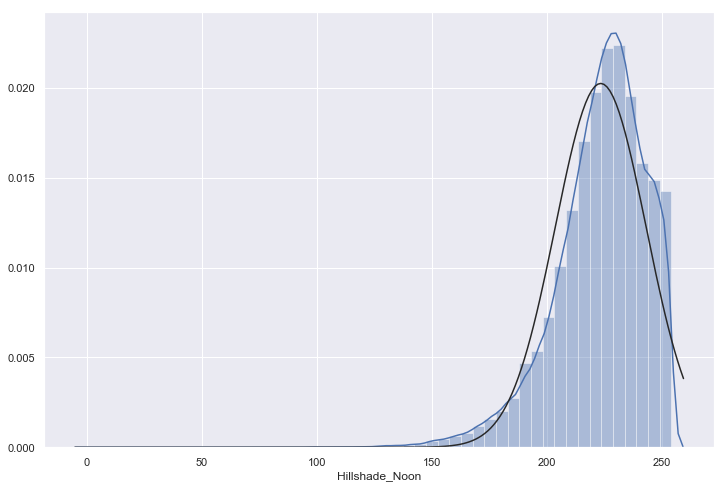

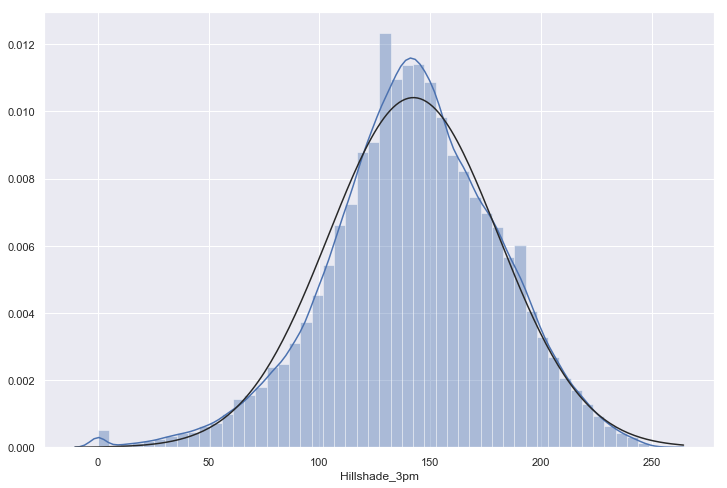

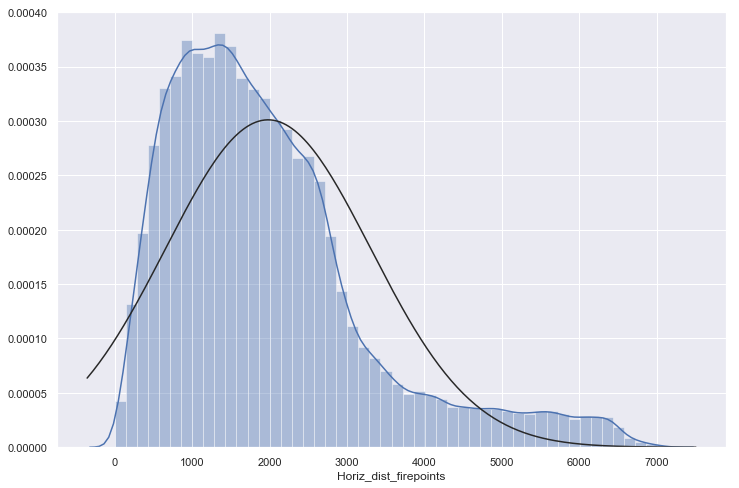

In [66]:
from scipy import stats
cont_feat = ["Elevation", "Aspect", "Slope", "Horiz_dist_hydro", "Vertical_dist_hydro", "Horiz_dist_roadways", 
            "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horiz_dist_firepoints"]
for a in cont_feat:
    plt.figure(figsize=(12,8))
    sns.distplot(df[a], fit = stats.norm)

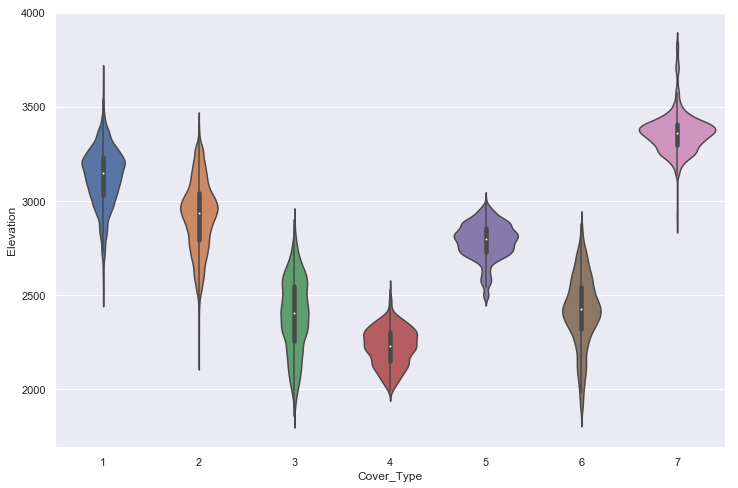

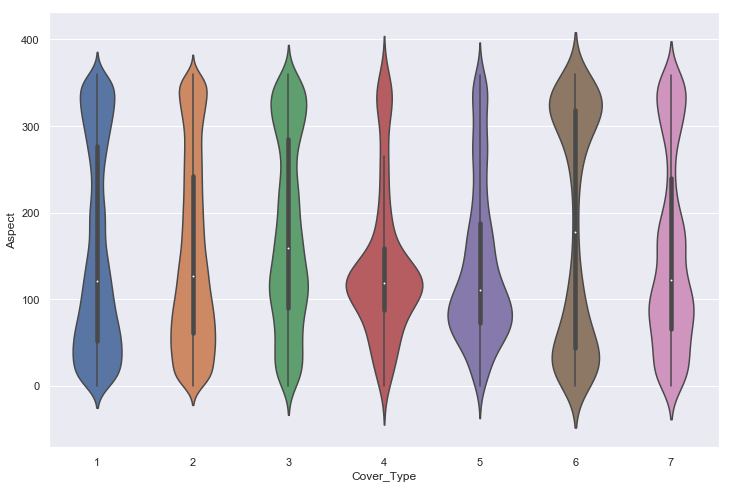

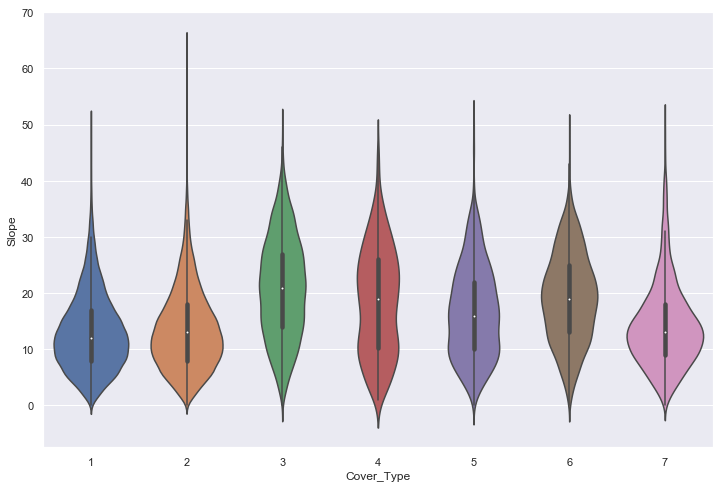

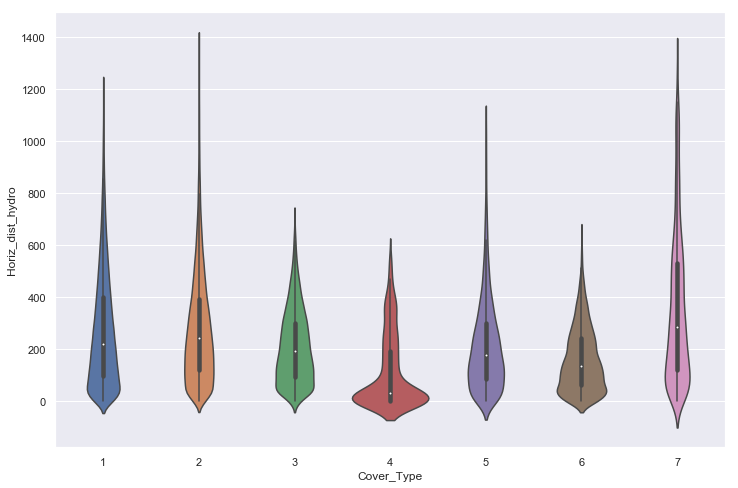

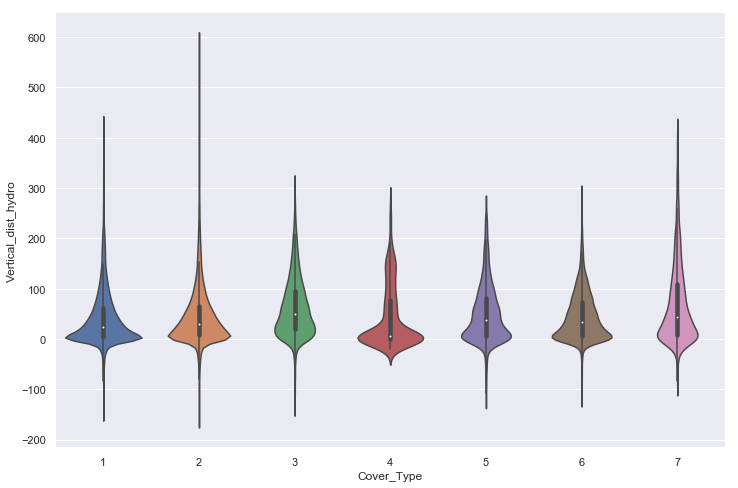

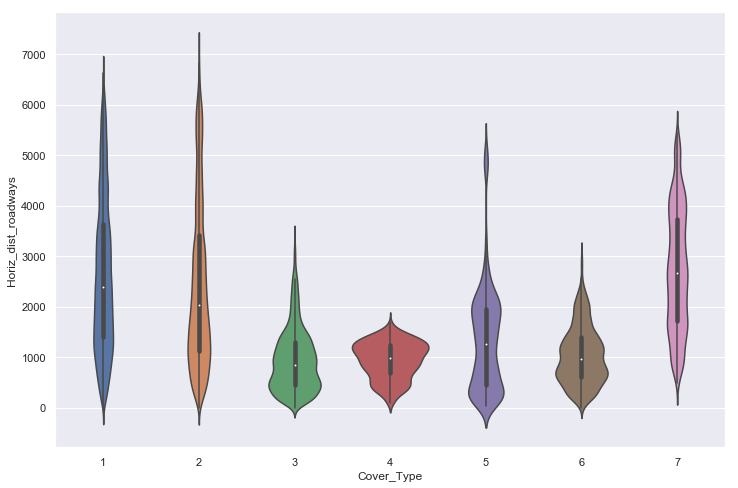

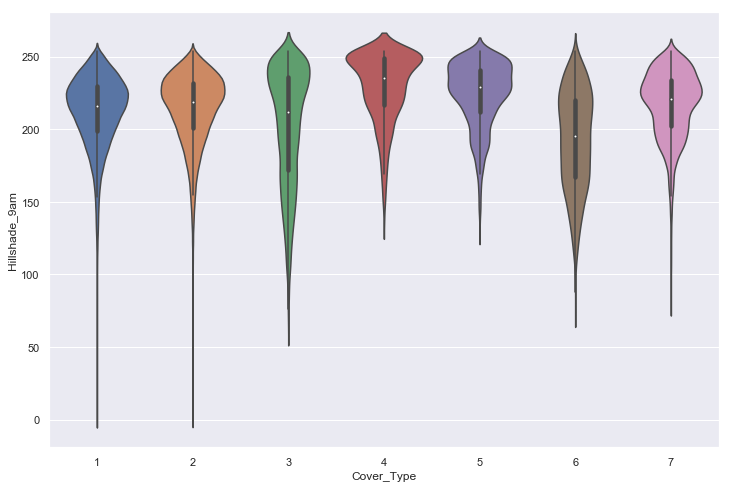

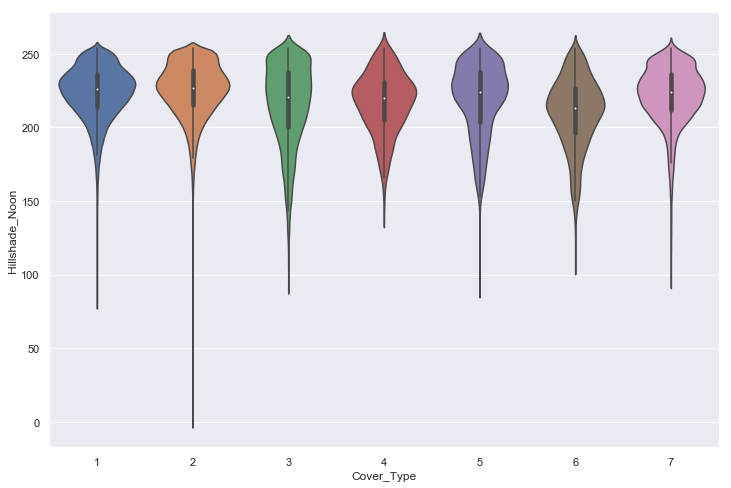

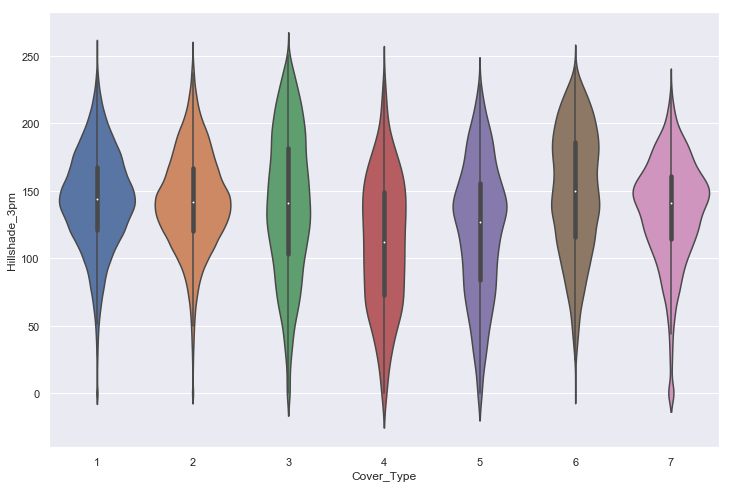

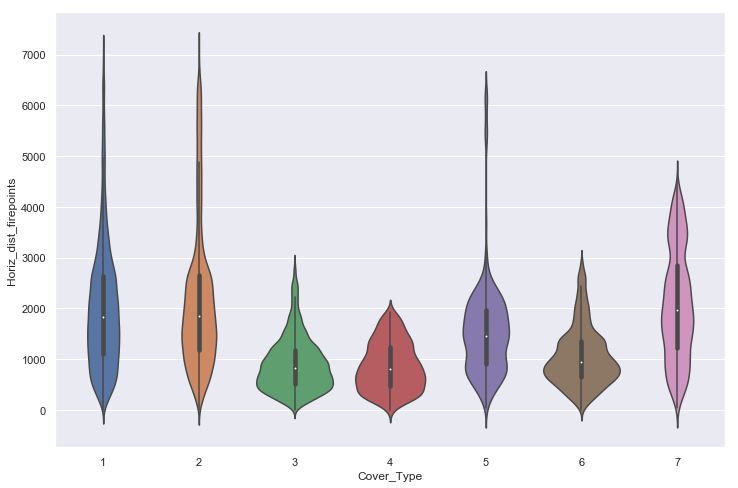

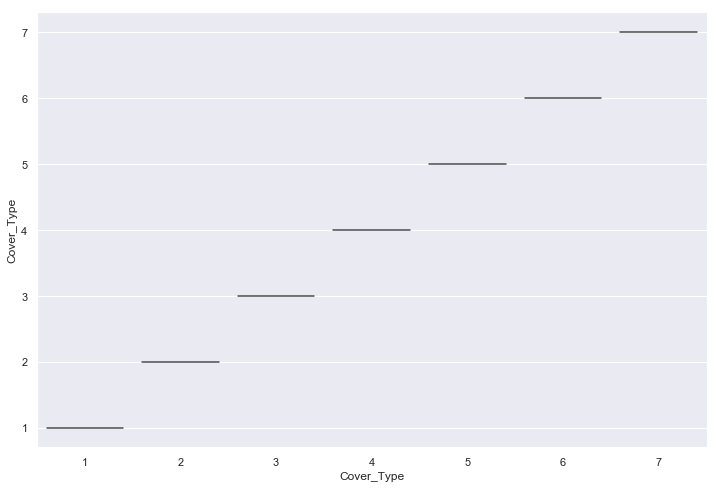

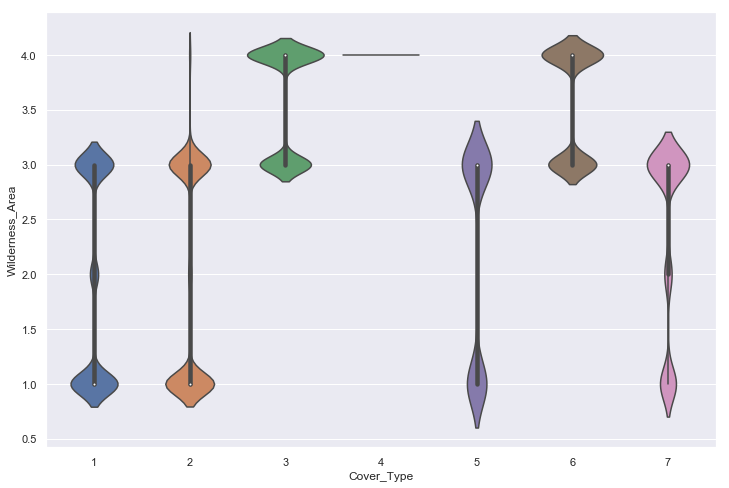

In [67]:
cols = df.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[-3]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    plt.figure(figsize=(12,8))
    sns.violinplot(data=df,x=x,y=y[i])  
    plt.show()

In [68]:
df[cont_feat].skew()

Elevation               -0.822334
Aspect                   0.405484
Slope                    0.792479
Horiz_dist_hydro         1.136535
Vertical_dist_hydro      1.768171
Horiz_dist_roadways      0.713991
Hillshade_9am           -1.179990
Hillshade_Noon          -1.052928
Hillshade_3pm           -0.280041
Horiz_dist_firepoints    1.287592
dtype: float64

### Multiclass Prediction - Log. Regr.

In [101]:
train_data_2 = pd.get_dummies(df, drop_first=True, columns=["Wilderness_Area", "Soil_Type"])

In [141]:
X = train_data_2.drop(["Cover_Type"], axis=1).values
y = train_data_2["Cover_Type"].values
X, y = shuffle(X, y, random_state=123)
#X = scl.fit_transform(X)
print(X.shape)
print(y.shape)

(174305, 52)
(174305,)


In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [125]:
model = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=10000, C=100)
model.fit(X, y)
y_pred_prob = cross_val_predict(model, X, y, cv=2, method="predict_proba")
y_pred = cross_val_predict(model, X, y, cv=2)


In [114]:
train_data_2["Cover_Type"].unique()

array([1, 2, 3, 4, 5, 6, 7])

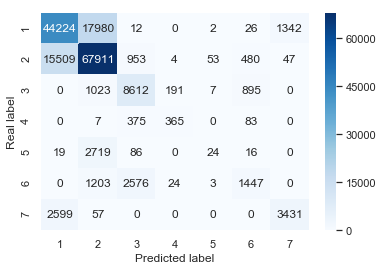

Accuracy (cross-validated):  0.7229511488482832
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     63586
           2       0.75      0.80      0.77     84957
           3       0.68      0.80      0.74     10728
           4       0.62      0.44      0.52       830
           5       0.27      0.01      0.02      2864
           6       0.49      0.28      0.35      5253
           7       0.71      0.56      0.63      6087

    accuracy                           0.72    174305
   macro avg       0.61      0.51      0.53    174305
weighted avg       0.71      0.72      0.71    174305



In [126]:
cm =  confusion_matrix(y_pred=y_pred, y_true=y, labels=[1, 2, 3, 4, 5, 6, 7])
plot_confusion_matrix(cm, ["1", "2", "3", "4", "5", "6", "7"])
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

In [127]:
bin_pred = [1 if a==7 else 0 for a in y_pred]
bin_real = [1 if a==7 else 0 for a in y]
print ("Accuracy (cross-validated): ", accuracy_score(bin_real, bin_pred))
print(classification_report(bin_real, bin_pred))

Accuracy (cross-validated):  0.976793551533232
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    168218
           1       0.71      0.56      0.63      6087

    accuracy                           0.98    174305
   macro avg       0.85      0.78      0.81    174305
weighted avg       0.97      0.98      0.98    174305



### Multi Class - Random Forrests

In [142]:
tree = RandomForestClassifier(n_estimators=100, class_weight="balanced_subsample")
tree.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

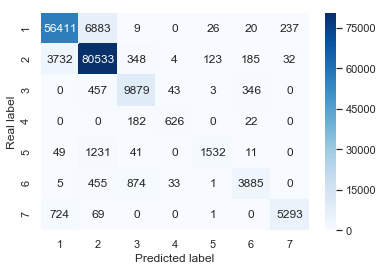

Accuracy (cross-validated):  0.9073692665155905
              precision    recall  f1-score   support

           1       0.93      0.89      0.91     63586
           2       0.90      0.95      0.92     84957
           3       0.87      0.92      0.90     10728
           4       0.89      0.75      0.82       830
           5       0.91      0.53      0.67      2864
           6       0.87      0.74      0.80      5253
           7       0.95      0.87      0.91      6087

    accuracy                           0.91    174305
   macro avg       0.90      0.81      0.85    174305
weighted avg       0.91      0.91      0.91    174305



In [143]:
y_pred_prob = cross_val_predict(tree, X, y, cv=2, method="predict_proba")
y_pred = cross_val_predict(tree, X, y, cv=2)
cm =  confusion_matrix(y_pred=y_pred, y_true=y, labels=[1, 2, 3, 4, 5, 6, 7])
plot_confusion_matrix(cm, ["1", "2", "3", "4", "5", "6", "7"])
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

In [144]:
bin_pred = [1 if a==7 else 0 for a in y_pred]
bin_real = [1 if a==7 else 0 for a in y]
print ("Accuracy (cross-validated): ", accuracy_score(bin_real, bin_pred))
print(classification_report(bin_real, bin_pred))

Accuracy (cross-validated):  0.9939014945067554
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168218
           1       0.95      0.87      0.91      6087

    accuracy                           0.99    174305
   macro avg       0.97      0.93      0.95    174305
weighted avg       0.99      0.99      0.99    174305

